# Predicting United States County Poverty Rates Through The Microsoft Capstone Project

The goal of this project is to predict accurately the poverty rate of United Sates counties. Predicting the value of a quantitative variable is a regression problem. The CRISP-DM Methodology was used to tackle this regression problem:

* Understand and explore the data
* Clean and transform the data
* Create a model
* Evaluate the model
* Deploying the model is not applicable to this project; or we could say that the creation of this report or the presentation of our findings counts as the deployment of this model.

## Regression Model

Using nested cross validation the best scoring regressor is a Ridge Linear Regression model:
* RMSE: .....
* R2: ....

The most significant features used in building this model are the following:
* feature 1
* feature 2
* feature 3

## Data Exploration
In order to build this model and determine the most significant features for this regression model a thorough data exploration was done to understand the relationship between poverty rates and other features.

In [1]:
import re
import bs4
import time
import plyfile
import html5lib
import multiprocessing

import numpy as np
import pandas as pd

from scipy import misc
import scipy.io.wavfile as wavfile

import scipy
from math import sqrt
from scipy import stats
from pprint import pprint
from sklearn import tree
from sklearn.svm import SVC
from sklearn import manifold
from tempfile import mkdtemp
from matplotlib import cm as cm


import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix
from scipy.stats import randint as sp_randint
from sklearn.pipeline import TransformerMixin
from sklearn.metrics.scorer import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold, ShuffleSplit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves

%matplotlib inline
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)

# Predicting Poverty Rates
The goal of our project is to effectively predict poverty rates for american counties. In order to do that we have identified the features or variables that hold the most predicting value and build a regression model around that.

## Data Exploration
We will explore the prediction value of the categorical and quantitative variables. In this process we will create new features. Lastly we explore the effect of outliers on the regression model.

In [2]:
poverty_train = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_values.csv')

In [3]:
poverty_train.shape

(3198, 34)

In [4]:
poverty_train.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [5]:
poverty_train.describe()

row_id  econ__pct_civilian_labor  econ__pct_unemployment  \
count  3198.000000               3198.000000              3198.00000   
mean   3156.692620                  0.467071                 0.05961   
std    1823.959278                  0.074541                 0.02285   
min       0.000000                  0.217000                 0.00800   
25%    1561.750000                  0.420000                 0.04400   
50%    3198.500000                  0.467000                 0.05700   
75%    4723.750000                  0.514000                 0.07100   
max    6277.000000                  1.000000                 0.24000   

       econ__pct_uninsured_adults  econ__pct_uninsured_children  \
count                 3196.000000                   3196.000000   
mean                     0.217534                      0.085920   
std                      0.067372                      0.040005   
min                      0.046000                      0.009000   
25%                      0.166000                      0.057000   
50%                      0.216000                      0.077000   
75%                      0.262000                      0.105000   
max                      0.495000                      0.285000   

       demo__pct_female  demo__pct_below_18_years_of_age  \
count       3196.000000                      3196.000000   
mean           0.498781                         0.227763   
std            0.024251                         0.034291   
min            0.294000                         0.098000   
25%            0.493000                         0.207000   
50%            0.503000                         0.226000   
75%            0.512000                         0.245250   
max            0.576000                         0.417000   

       demo__pct_aged_65_years_and_older  demo__pct_hispanic  \
count                        3196.000000         3196.000000   
mean                            0.170137            0.090233   
std                             0.043594            0.142707   
min                             0.043000            0.000000   
25%                             0.142000            0.019000   
50%                             0.167000            0.035000   
75%                             0.194000            0.088000   
max                             0.355000            0.945000   

       demo__pct_non_hispanic_african_american  demo__pct_non_hispanic_white  \
count                              3196.000000                   3196.000000   
mean                                  0.091117                      0.770207   
std                                   0.147104                      0.207903   
min                                   0.000000                      0.060000   
25%                                   0.006000                      0.648000   
50%                                   0.022000                      0.854000   
75%                                   0.096250                      0.936000   
max                                   0.855000                      0.998000   

       demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
count                                  3196.000000      3196.000000   
mean                                      0.024659         0.013304   
std                                       0.084634         0.025366   
min                                       0.000000         0.000000   
25%                                       0.002000         0.003000   
50%                                       0.007000         0.007000   
75%                                       0.014000         0.013000   
max                                       0.852000         0.346000   

       demo__pct_adults_less_than_a_high_school_diploma  \
count                                       3198.000000   
mean                                           0.148794   
std                                            0.068255   
min                                         

In [6]:
poverty_labels = pd.read_csv('Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_labels.csv')
poverty_labels.head()

row_id  poverty_rate
0       0          22.6
1       2          17.3
2       4          24.4
3       5          16.4
4       8          17.4

In [7]:
poverty_labels.shape

(3198, 2)

In [8]:
poverty_labels.dtypes

row_id            int64
poverty_rate    float64
dtype: object

In [9]:
poverty_labels.describe()

row_id  poverty_rate
count  3198.000000   3198.000000
mean   3156.692620     16.817136
std    1823.959278      6.697969
min       0.000000      2.500000
25%    1561.750000     12.000000
50%    3198.500000     15.800000
75%    4723.750000     20.300000
max    6277.000000     47.400000

poverty_rate is right skewed of positively skewed.

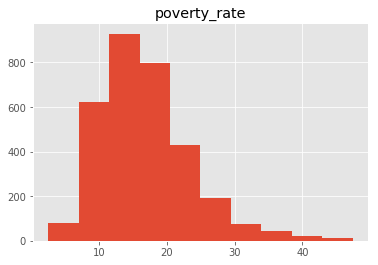

In [10]:
poverty_lb_raw = poverty_labels
hist_pov_lb = poverty_lb_raw.hist(column='poverty_rate')

Create one dataset by merging poverty_train and povert_labels. This is necessary to do a good statistical exploration of the data.

In [11]:
poverty = pd.merge(poverty_train, poverty_labels, on='row_id')
poverty.shape

(3198, 35)

In [12]:
richest = poverty.sort_values(by='poverty_rate')[:5]
richest

row_id                                         area__rucc  \
116      208  Nonmetro - Completely rural or less than 2,500...   
2788    5479  Metro - Counties in metro areas of 1 million p...   
1581    3151  Nonmetro - Completely rural or less than 2,500...   
90       162  Metro - Counties in metro areas of 1 million p...   
3039    5973  Metro - Counties in metro areas of 1 million p...   

                                  area__urban_influence  \
116   Noncore not adjacent to a metro/micro area and...   
2788  Large-in a metro area with at least 1 million ...   
1581  Noncore not adjacent to a metro/micro area and...   
90    Large-in a metro area with at least 1 million ...   
3039  Large-in a metro area with at least 1 million ...   

     econ__economic_typology  econ__pct_civilian_labor  \
116               Recreation                     0.783   
2788          Nonspecialized                     0.581   
1581              Recreation                     0.764   
90            Nonspecialized                     0.538   
3039          Nonspecialized                     0.567   

      econ__pct_unemployment  econ__pct_uninsured_adults  \
116                    0.117                         NaN   
2788                   0.033                       0.086   
1581                   0.115                         NaN   
90                     0.031                       0.110   
3039                   0.032                       0.083   

      econ__pct_uninsured_children  demo__pct_female  \
116                            NaN               NaN   
2788                         0.038             0.509   
1581                           NaN               NaN   
90                           0.041             0.499   
3039                         0.031             0.503   

      demo__pct_below_18_years_of_age  demo__pct_aged_65_years_and_older  \
116                               NaN                                NaN   
2788                            0.248                              0.110   
1581                              NaN                                NaN   
90                              0.293                              0.075   
3039                            0.260                              0.108   

      demo__pct_hispanic  demo__pct_non_hispanic_african_american  \
116                  NaN                                      NaN   
2788               0.099                                    0.035   
1581                 NaN                                      NaN   
90                 0.134                                    0.074   
3039               0.098                                    0.039   

      demo__pct_non_hispanic_white  \
116                            NaN   
2788                         0.738   
1581                           NaN   
90                           0.612   
3039                         0.725   

      demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
116                                           NaN              NaN   
2788                                        0.000            0.093   
1581                                          NaN              NaN   
90                                          0.007            0.156   
3039                                        0.007            0.098   

      demo__pct_adults_less_than_a_high_school_diploma  \
116                                           0.026812   
2788                                          0.019487   
1581                                          0.022066   
90                                            0.065327   
3039                                          0.018627   

      demo__pct_adults_with_high_school_diploma  \
116                                    0.288977   
2788                                   0.072821   
1581                                   0.287864   
90                                     0.139698   
3039                                   0.087255   

      demo__pct_adults_

In [13]:
poorest = poverty.sort_values(by='poverty_rate', ascending=False)[:5]
poorest

row_id                                         area__rucc  \
553     1084  Nonmetro - Completely rural or less than 2,500...   
1059    2080  Nonmetro - Completely rural or less than 2,500...   
2473    4863  Nonmetro - Completely rural or less than 2,500...   
2100    4183  Nonmetro - Completely rural or less than 2,500...   
916     1802  Nonmetro - Completely rural or less than 2,500...   

                                  area__urban_influence  \
553   Noncore adjacent to micro area and does not co...   
1059  Noncore not adjacent to a metro/micro area and...   
2473  Noncore adjacent to a small metro and does not...   
2100             Noncore adjacent to a large metro area   
916         Micropolitan adjacent to a small metro area   

                 econ__economic_typology  econ__pct_civilian_labor  \
553   Federal/State government-dependent                     0.286   
1059                      Farm-dependent                     0.360   
2473                      Farm-dependent                     0.352   
2100                      Nonspecialized                     0.351   
916                       Nonspecialized                     0.343   

      econ__pct_unemployment  econ__pct_uninsured_adults  \
553                    0.101                       0.265   
1059                   0.055                       0.299   
2473                   0.053                       0.277   
2100                   0.122                       0.254   
916                    0.126                       0.251   

      econ__pct_uninsured_children  demo__pct_female  \
553                          0.061             0.455   
1059                         0.100             0.497   
2473                         0.094             0.502   
2100                         0.070             0.530   
916                          0.069             0.534   

      demo__pct_below_18_years_of_age  demo__pct_aged_65_years_and_older  \
553                             0.218                              0.136   
1059                            0.342                              0.103   
2473                            0.368                              0.071   
2100                            0.244                              0.171   
916                             0.228                              0.143   

      demo__pct_hispanic  demo__pct_non_hispanic_african_american  \
553                0.021                                    0.043   
1059               0.031                                    0.000   
2473               0.036                                    0.002   
2100               0.013                                    0.686   
916                0.016                                    0.837   

      demo__pct_non_hispanic_white  \
553                          0.903   
1059                         0.306   
2473                         0.233   
2100                         0.299   
916                          0.139   

      demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
553                                         0.003            0.000   
1059                                        0.653            0.000   
2473                                        0.720            0.000   
2100                                        0.000            0.006   
916                                         0.004            0.011   

      demo__pct_adults_less_than_a_high_school_diploma  \
553                                           0.279397   
1059                                          0.180377   
2473                                          0.139581   
2100                                          0.255721   
916                                           0.217435   

      demo__pct_adults_with_high_school_diploma  \
553                                    0.405025   
1059                                   0.338949   
2473                                   0.406780   
2100                                   0.377114   
916

Just by eye balling the top five poorest and richest counties...

Furthermore we can start to develop an intuition that to differentiate between counties that have a low poverty rate and high poverty rate:
* econ__economic_typology 'Recreation' or 'Nonspecialized'.
* low percentage unemployement and high percentage of civilian labor.
* are higher educated
* have better healthcare

### Data Exploration and Visualization of Categorical Variables
Here we explore the prediction value of the categorical variables 'econ__economic_typology', 'area__urban_influence', 'area__rucc' and 'yr'. We use mostly boxplots and one way analysis of variance (ANOVA).

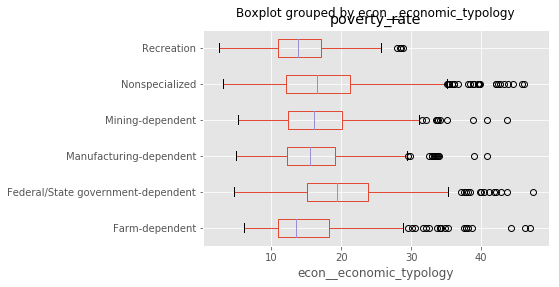

In [14]:
bpd_eet = poverty.boxplot(column='poverty_rate', by='econ__economic_typology', vert=False, return_type='dict')

There are alot more 'Nonspecialised' eets!

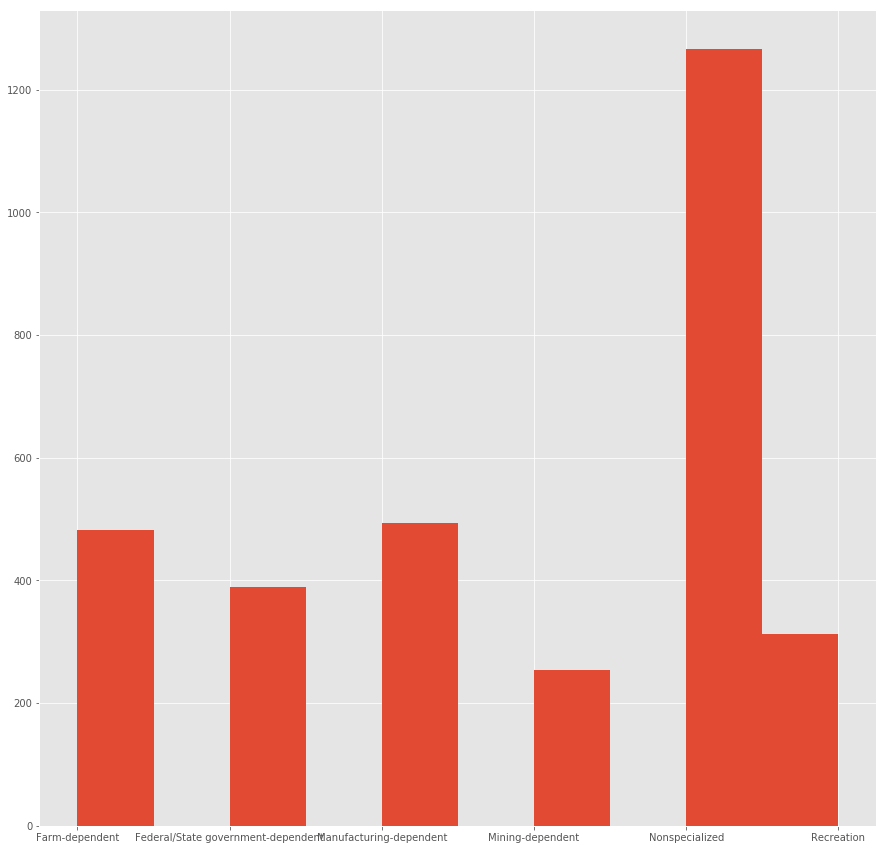

In [15]:
hb_eet = poverty.econ__economic_typology.hist(figsize=(15,15))

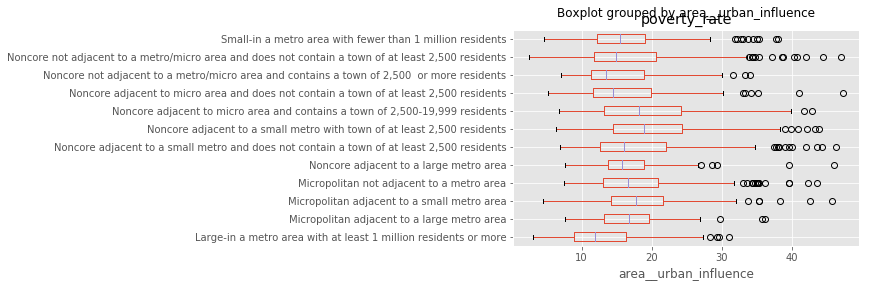

In [16]:
bpd_aui = poverty.boxplot(column='poverty_rate', by='area__urban_influence', vert=False, return_type='dict')

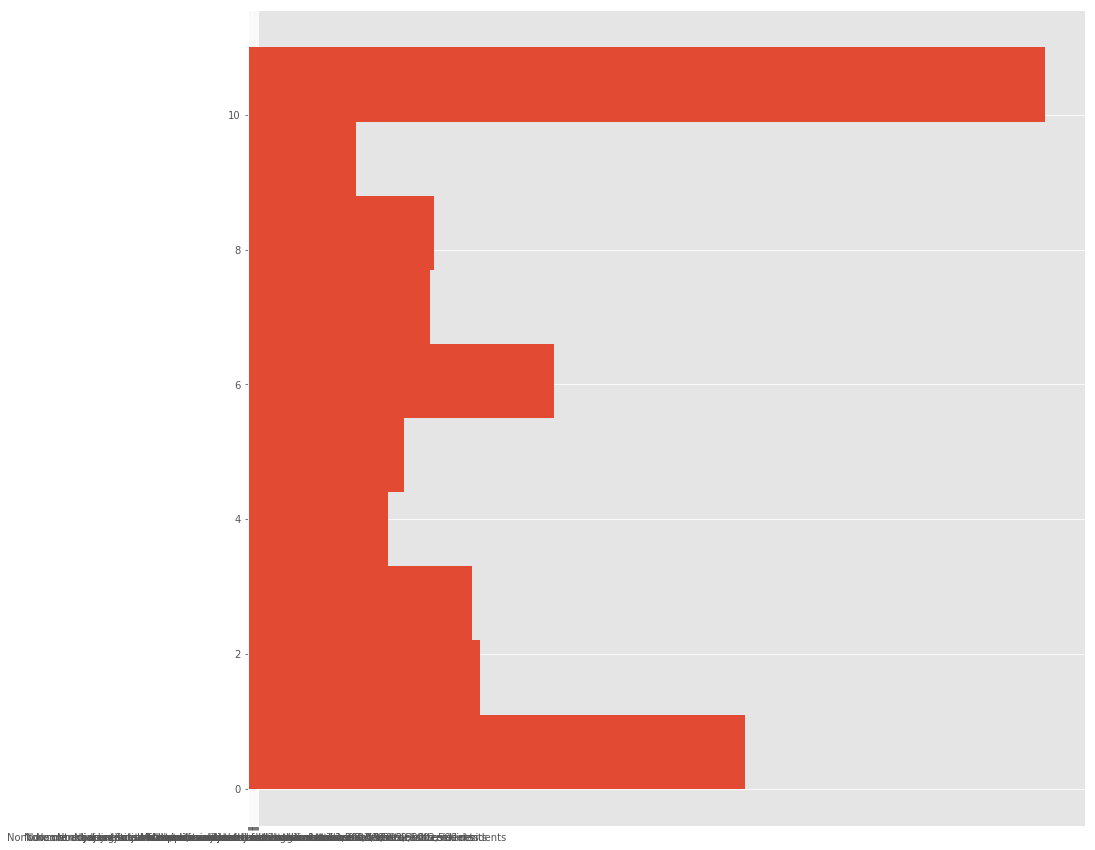

In [17]:
hb_rucc = poverty.area__urban_influence.hist(orientation='horizontal', figsize=(15,15))

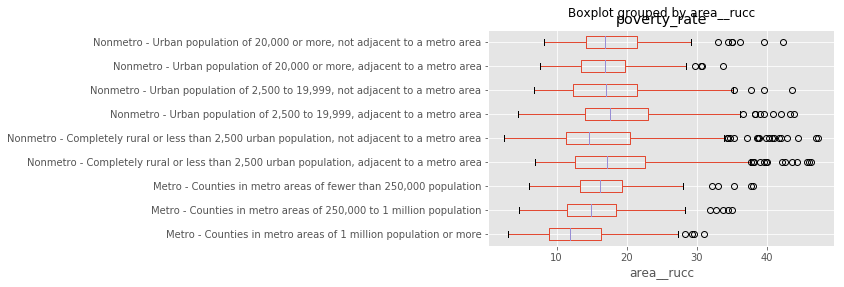

In [18]:
bpd_rucc = poverty.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

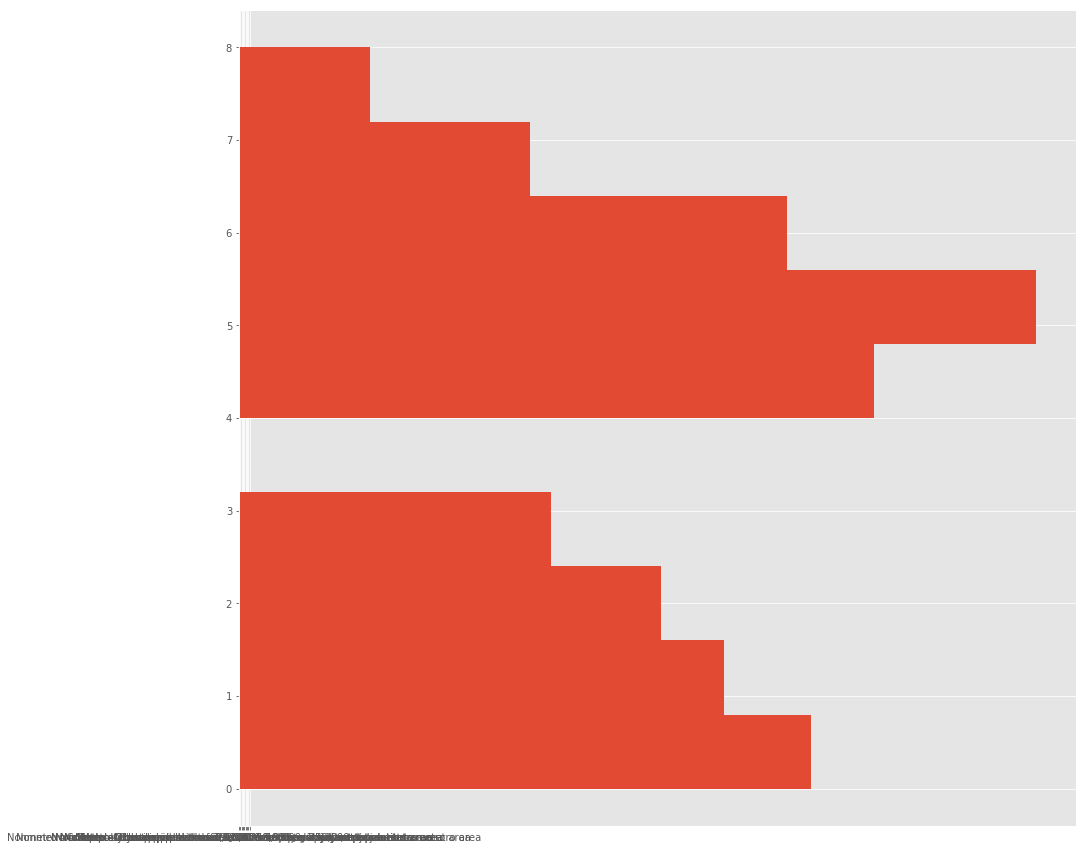

In [19]:
hb_area_rucc = poverty.area__rucc.hist(orientation='horizontal',figsize=(15,15))

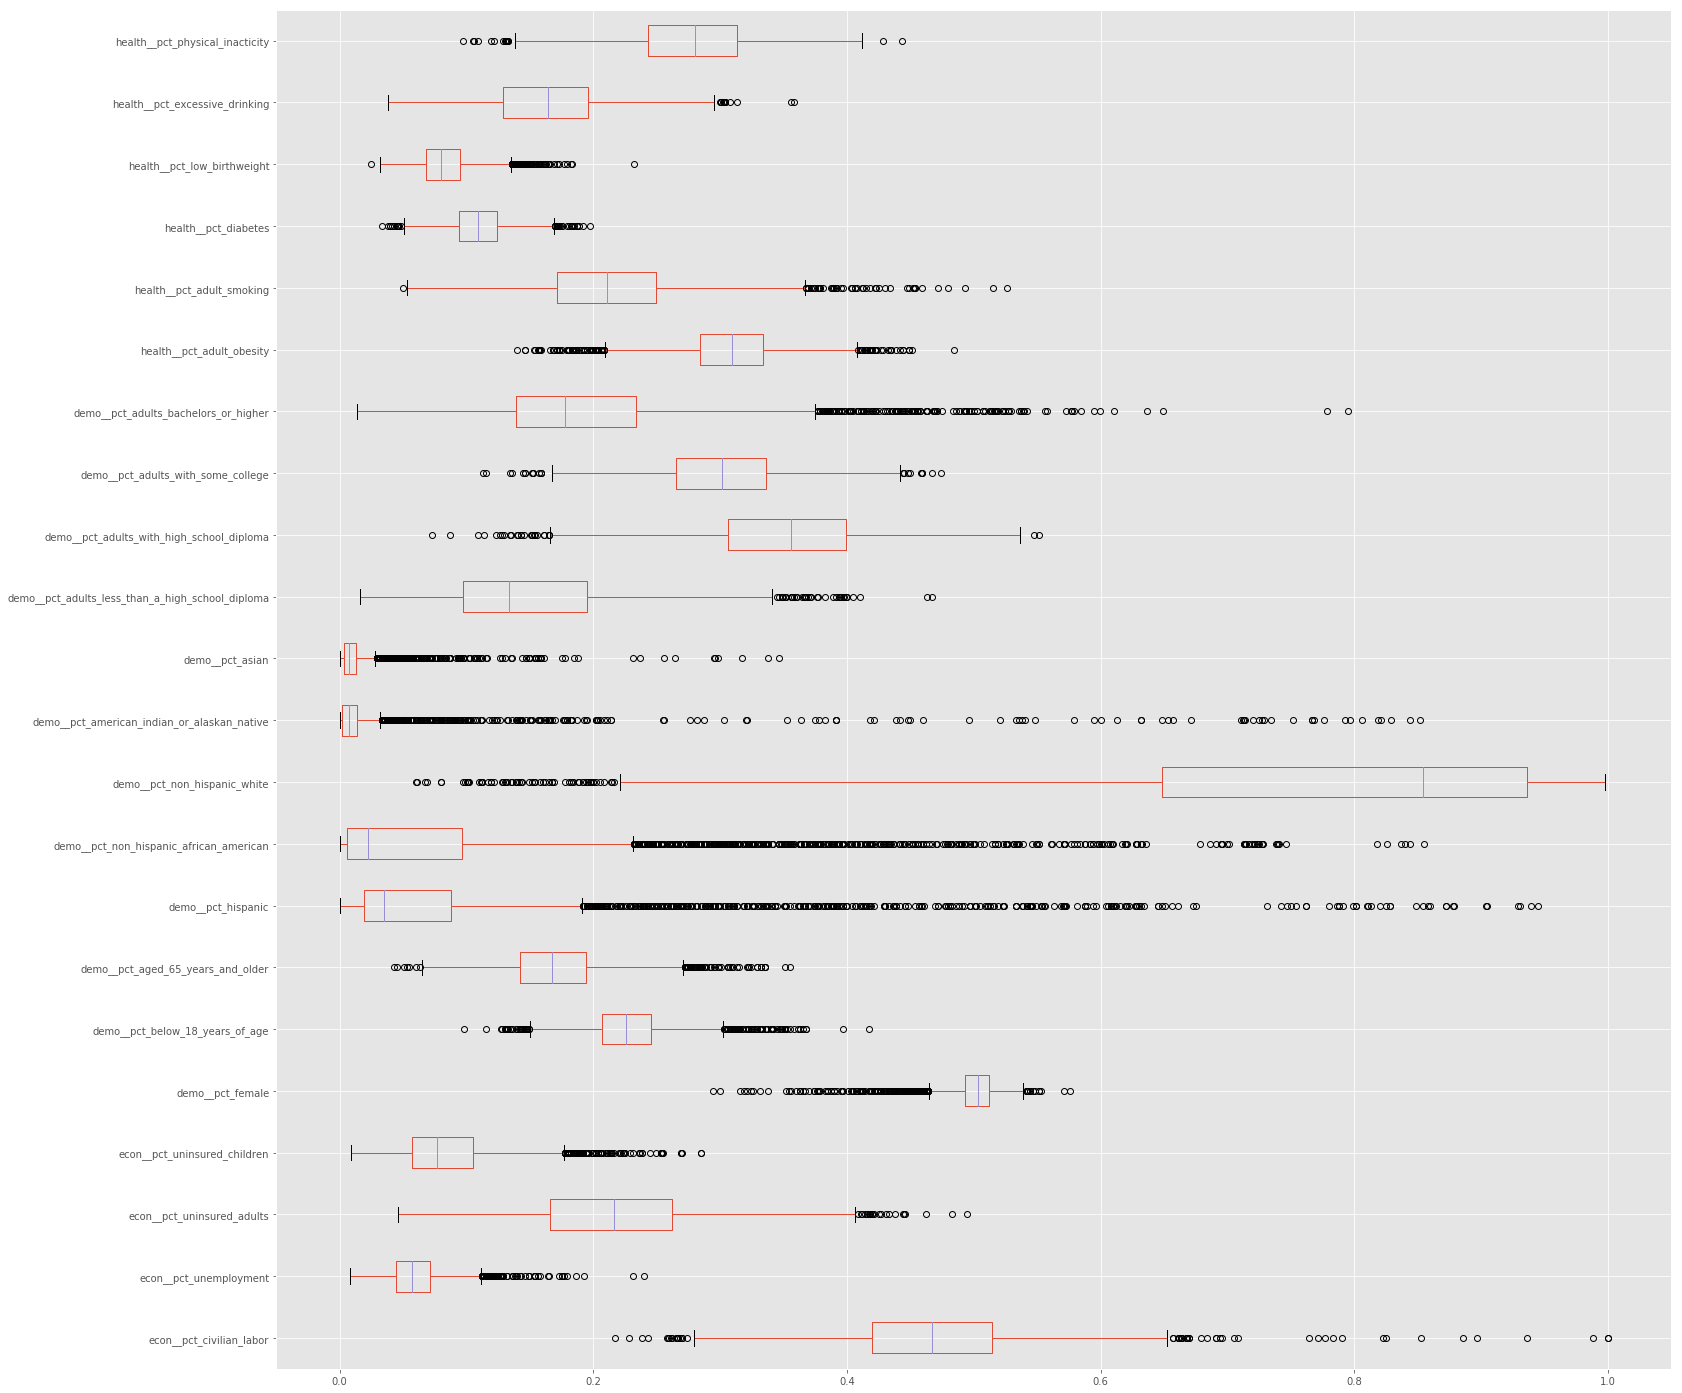

In [20]:
poverty_floats = poverty.loc[:, poverty.dtypes == np.float]
poverty_floats = poverty_floats.drop(columns=['poverty_rate','health__pop_per_primary_care_physician'
                                              , 'health__pop_per_dentist', 'health__motor_vehicle_crash_deaths_per_100k'
                                             , 'health__air_pollution_particulate_matter','demo__death_rate_per_1k'
                                             , 'demo__birth_rate_per_1k', 'health__homicides_per_100k'], axis=1)
poverty_floats.boxplot(figsize=(25,25), vert=False)

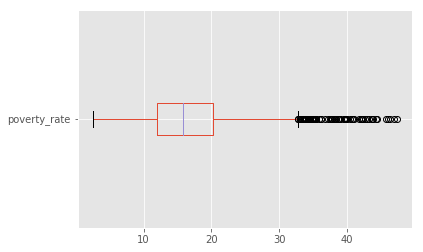

In [21]:
poverty[['poverty_rate']].boxplot(vert=False)

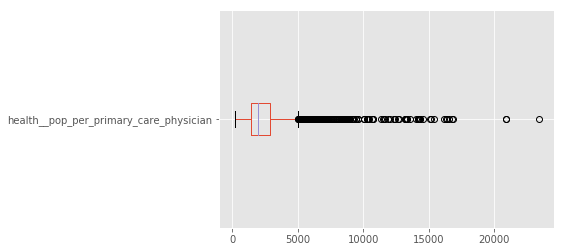

In [22]:
poverty[['health__pop_per_primary_care_physician']].boxplot(vert=False)

In [23]:
#creating new feature
# poverty_cp = poverty
# poverty_cp.loc[poverty_cp.health__pop_per_primary_care_physician > 5000,'health_pop_ppp'] = 'outliers'
# poverty_cp.loc[poverty_cp.health__pop_per_primary_care_physician < 5000,'health_pop_ppp'] = 'normal'
# poverty_cp.boxplot(column='poverty_rate', by='health_pop_ppp', vert=False, return_type='dict')

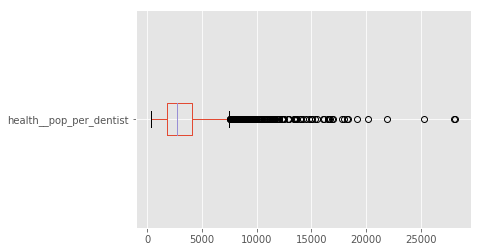

In [24]:
poverty[['health__pop_per_dentist']].boxplot(vert=False)

In [25]:
#creating new feature
# poverty_cp = poverty
# poverty_cp.loc[poverty_cp.health__pop_per_dentist > 7500,'health_pop_pd'] = 'outliers'
# poverty_cp.loc[poverty_cp.health__pop_per_dentist < 7500,'health_pop_pd'] = 'normal'
# poverty_cp.boxplot(column='poverty_rate', by='health_pop_pd', vert=False, return_type='dict')

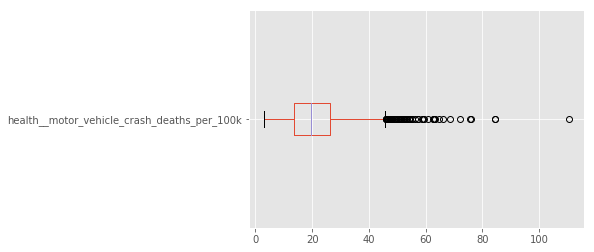

In [26]:
poverty[['health__motor_vehicle_crash_deaths_per_100k']].boxplot(vert=False)

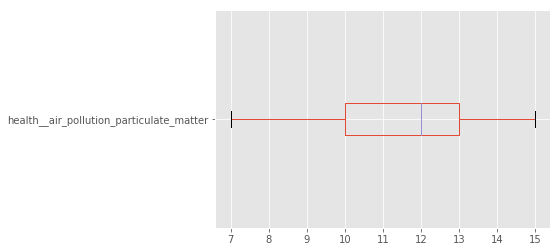

In [27]:
poverty[['health__air_pollution_particulate_matter']].boxplot(vert=False)

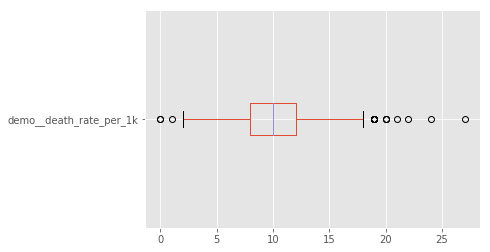

In [28]:
poverty[['demo__death_rate_per_1k']].boxplot(vert=False)

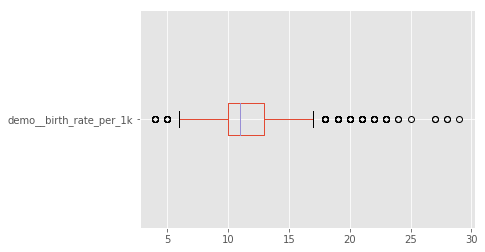

In [29]:
poverty[['demo__birth_rate_per_1k']].boxplot(vert=False)

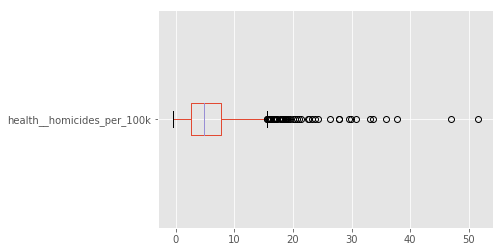

In [30]:
poverty[['health__homicides_per_100k']].boxplot(vert=False)

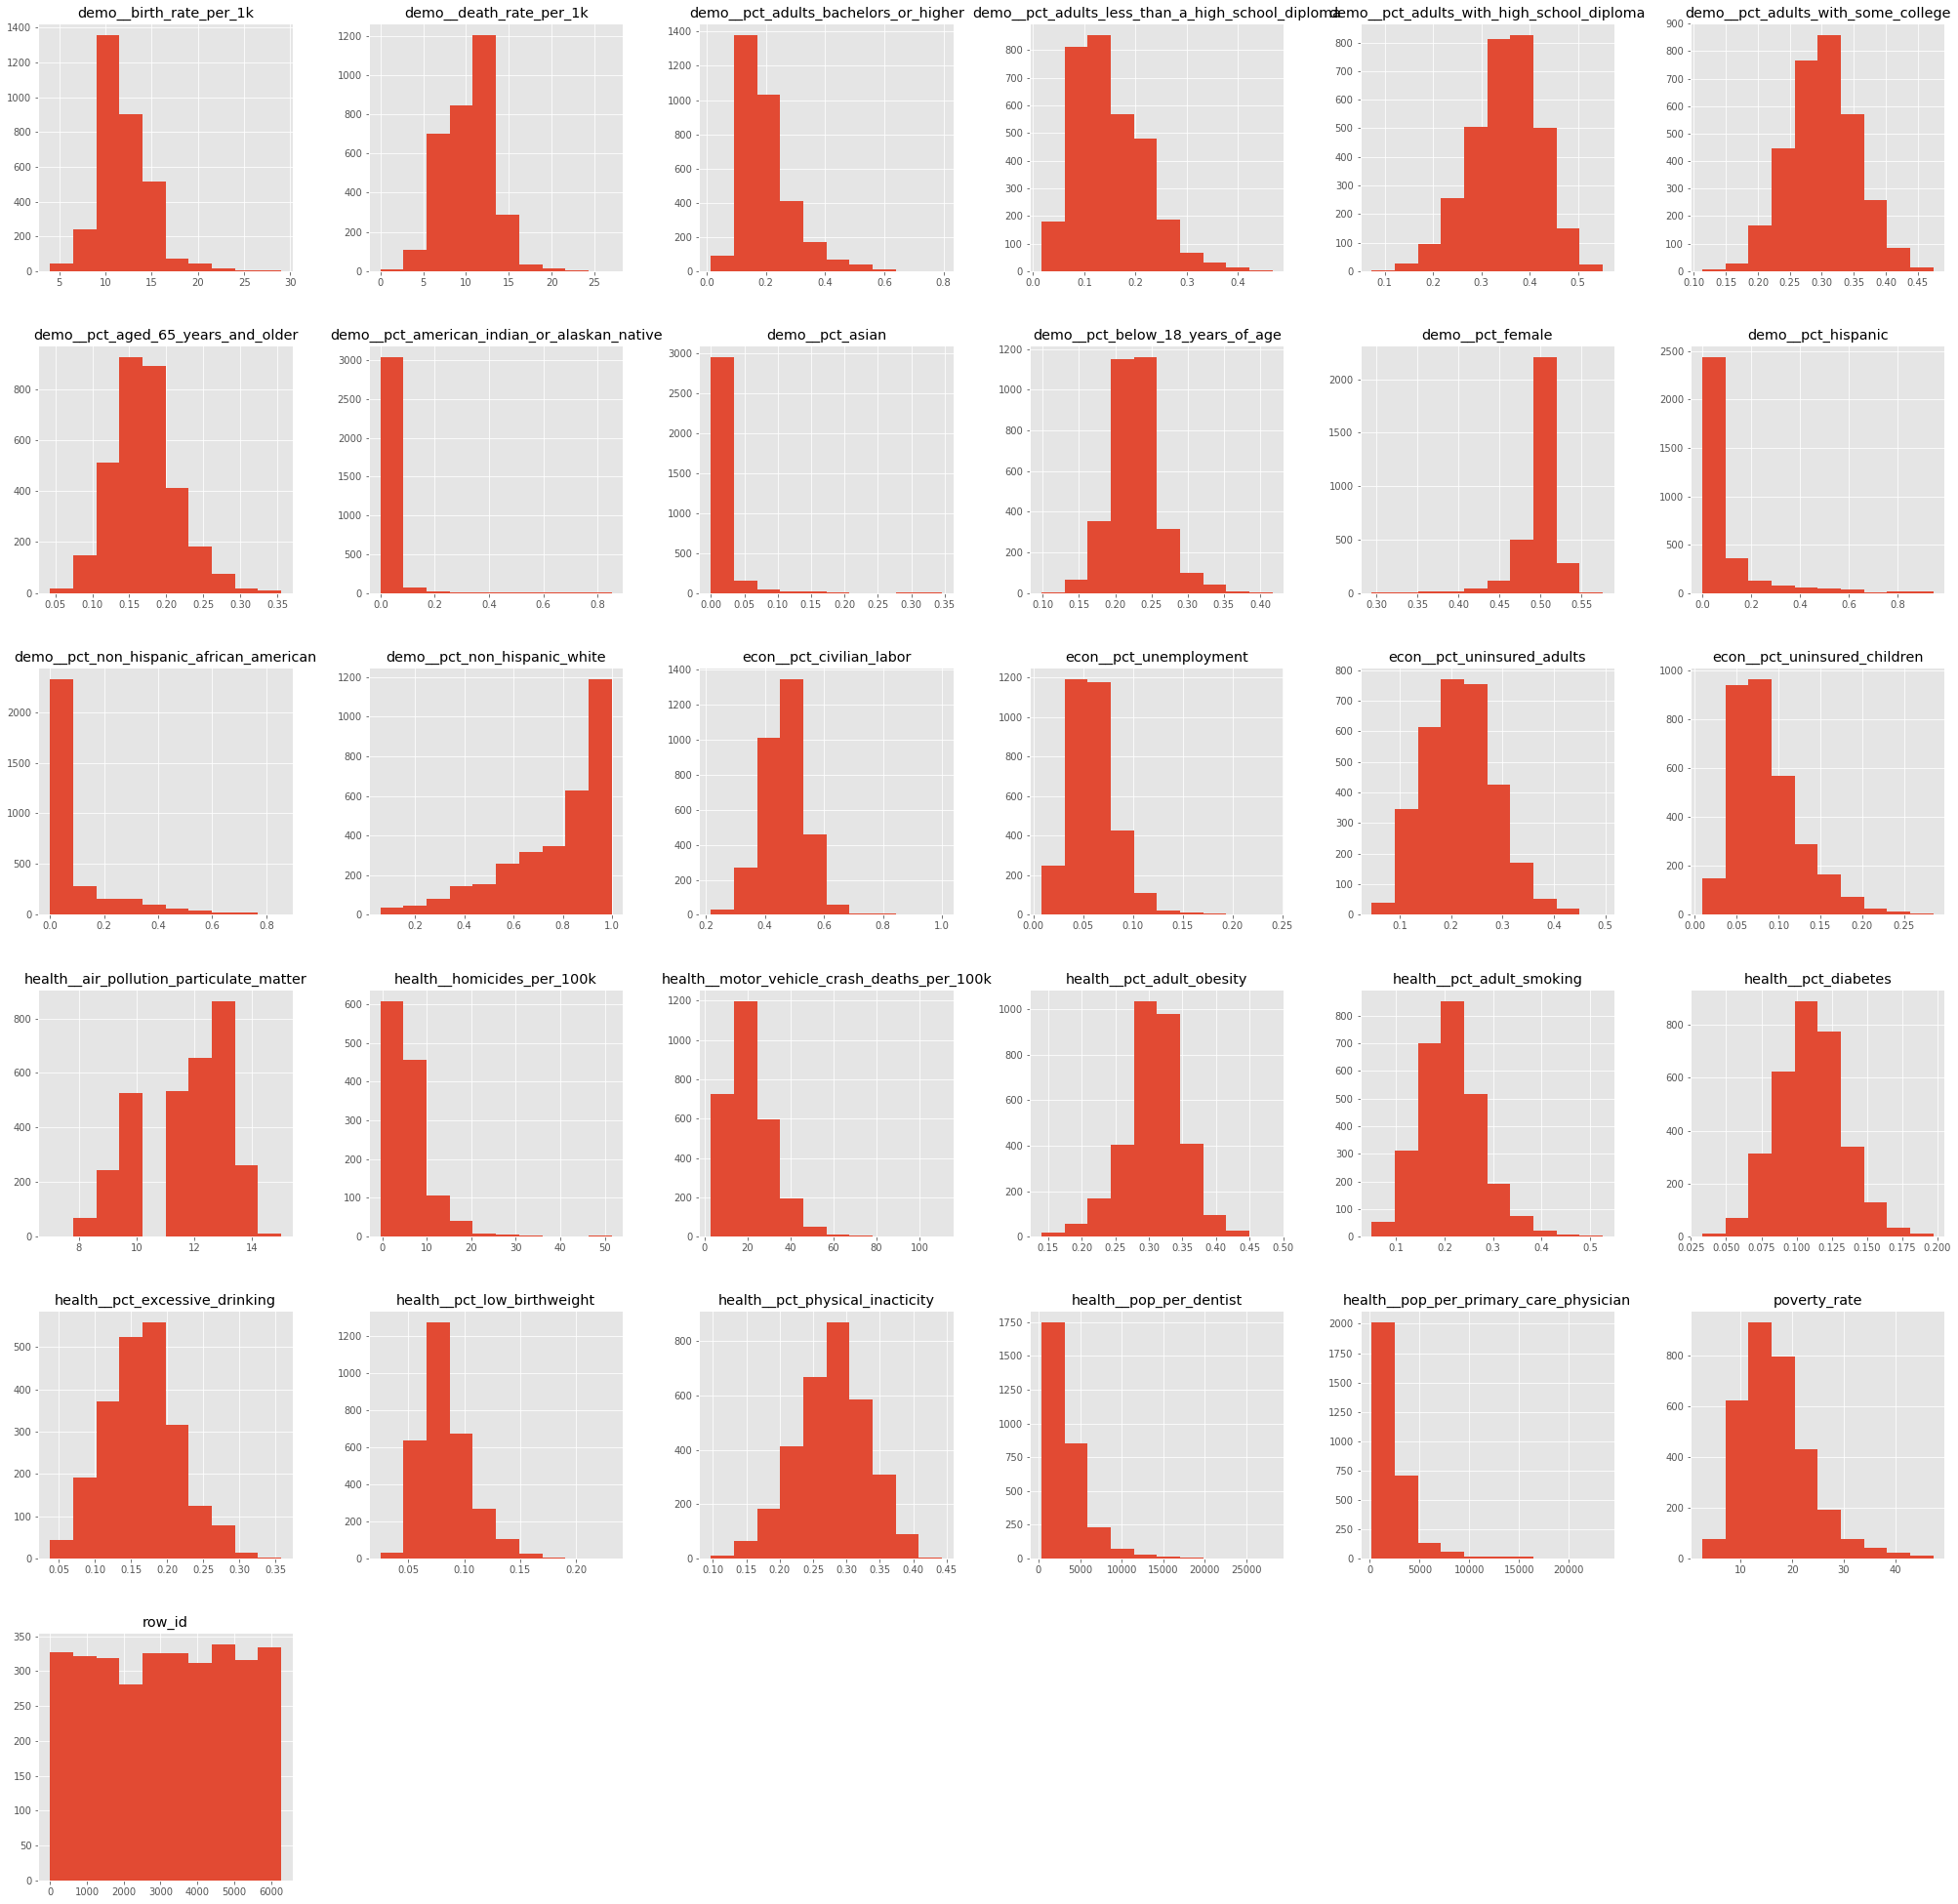

In [31]:
hist_pov = poverty.hist(figsize=(35,35))

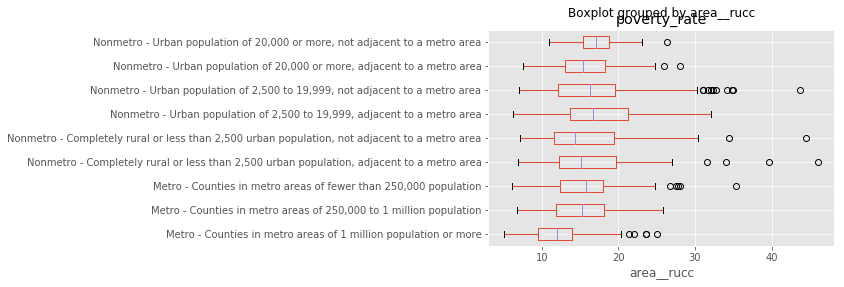

In [32]:
old_counties = poverty.demo__pct_aged_65_years_and_older > 0.167000
old_poor = poverty.loc[old_counties,:]
bpd_old = old_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

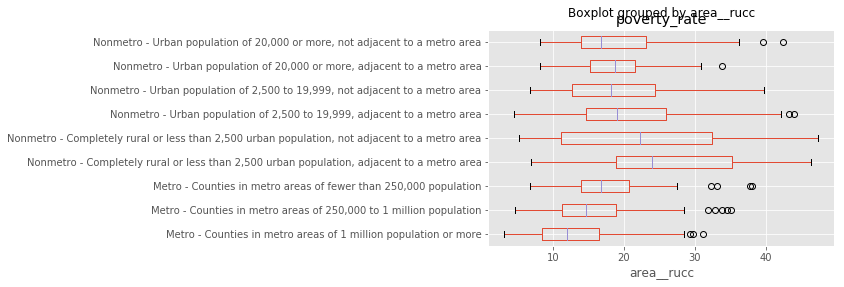

In [33]:
young_counties = poverty.demo__pct_aged_65_years_and_older < 0.167000
young_poor = poverty.loc[young_counties,:]
bpd_young = young_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

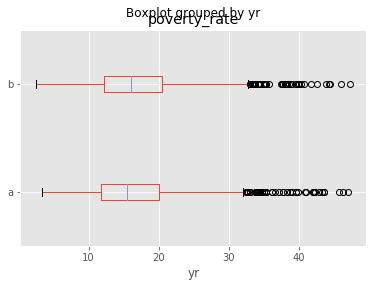

In [34]:
bpd_yr = poverty.boxplot(column='poverty_rate', by='yr', vert=False)

The categorical variable 'yr' does not hold any value to differentiate poverty rates. We will therefore drop it at the cleaning stage.

### Creation and Visualization of New Categorical Variables

In [35]:
def create_eet(input_df):
    input_df.loc[input_df.econ__economic_typology == 'Recreation','eet'] = 'Recreation/Farm'
    input_df.loc[input_df.econ__economic_typology == 'Nonspecialized','eet'] = 'Other EET'
    input_df.loc[input_df.econ__economic_typology == 'Mining-dependent','eet'] = 'Other EET'
    input_df.loc[input_df.econ__economic_typology == 'Manufacturing-dependent','eet'] = 'Other EET'
    input_df.loc[input_df.econ__economic_typology == 'Federal/State government-dependent','eet'] = 'Federal/State'
    input_df.loc[input_df.econ__economic_typology == 'Farm-dependent','eet'] = 'Recreation/Farm'
    return input_df

In [36]:
# poverty = create_eet(poverty)
# bpd_n_eet = poverty.boxplot(column='poverty_rate', by='eet', vert=False)

In [37]:
def create_aui(input_df):
    input_df.loc[input_df.area__urban_influence == 'Noncore adjacent to a large metro area','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Micropolitan adjacent to a large metro area','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents','aui'] ='High AUI'
    input_df.loc[input_df.area__urban_influence == 'Large-in a metro area with at least 1 million residents or more','aui'] = 'Low AUI'
    input_df.loc[input_df.area__urban_influence == 'Micropolitan not adjacent to a metro area','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore adjacent to a small metro with town of at least 2,500 residents','aui'] = 'High AUI'
    input_df.loc[input_df.area__urban_influence == 'Small-in a metro area with fewer than 1 million residents','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
    input_df.loc[input_df.area__urban_influence == 'Micropolitan adjacent to a small metro area','aui'] = 'High AUI'
    return input_df

In [38]:
# poverty = create_aui(poverty)
# bpd_n_aui = poverty.boxplot(column='poverty_rate', by='aui', vert=False)

In [39]:
def create_rucc(input_df):
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area','rucc'] = 'High RUCC'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area','rucc'] ='High RUCC'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area','rucc'] = 'Low RUCC'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area','rucc'] ='High RUCC'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 1 million population or more','rucc'] = 'Low RUCC'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 250,000 to 1 million population','rucc'] = 'Low RUCC'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area','rucc'] = 'High RUCC'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area','rucc'] = 'High RUCC'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of fewer than 250,000 population','rucc'] = 'Low RUCC'
    return input_df

In [40]:
# poverty = create_rucc(poverty)
# bpd_n_rucc = poverty.boxplot(column='poverty_rate', by='rucc', vert=False)

The categorical variable age does not hold any value by itself.

In [41]:
def create_age_cat(input_df, young_counties, old_counties):
    input_df.loc[young_counties,'age_cat'] = 'young'
    input_df.loc[old_counties,'age_cat'] = 'old'
    return input_df

In [42]:
# poverty = create_age_cat(poverty, young_counties, old_counties)
# bpd_n_age = poverty.boxplot(column='poverty_rate', by=['age_cat'], vert=False)

In [43]:
def create_age_rucc(input_df, young_counties, old_counties):
    rucc_low = poverty.rucc == 'Low RUCC'
    rucc_high = poverty.rucc == 'High RUCC'
    input_df.loc[young_counties & rucc_low,'age_rucc'] = 'Young Low Poverty'
    input_df.loc[young_counties & rucc_high,'age_rucc'] = 'Young High Poverty'
    input_df.loc[old_counties & rucc_low,'age_rucc'] = 'Old Low Poverty'
    input_df.loc[old_counties & rucc_high,'age_rucc'] = 'Old High Poverty'
    return input_df

In [44]:
# poverty = create_age_rucc(poverty, young_counties, old_counties)
# bpd_n_age_rucc = poverty.boxplot(column='poverty_rate', by='age_rucc', vert=False)

### Data Exploration and Visualization of Quantitative Variables
We make several scatter plot matrics to visually explore the relationship between the quantitative variables and poverty_rate. Furthermore we look at the correlation matrix, to quantitavely visualize the correlation coefficients.

#### Correlation matrix
Compute the correlation matrix. Identify features with highest positive and negative pearson correlation coefficient. 

The features that correlate most positevely with poverty_rate (> 0.5):
* demo__pct_non_hispanic_african_american             0.507048
* health__pct_diabetes                                0.537038
* econ__pct_uninsured_adults                          0.541712
* health__pct_low_birthweight                         0.565456
* econ__pct_unemployment                              0.592022
* health__homicides_per_100k                          0.621399
* demo__pct_adults_less_than_a_high_school_diploma    0.680360

The features that correlate most negatively with poverty_rate (< - 0.5):
* econ__pct_civilian_labor                           -0.670417

In [45]:
corr_m = poverty.corr()
corr_m.sort_values(by='poverty_rate').loc[:,'poverty_rate']

econ__pct_civilian_labor                           -0.670417
demo__pct_non_hispanic_white                       -0.499974
demo__pct_adults_bachelors_or_higher               -0.467134
demo__pct_adults_with_some_college                 -0.363875
health__pct_excessive_drinking                     -0.353254
demo__pct_asian                                    -0.163033
demo__pct_aged_65_years_and_older                  -0.088123
demo__pct_female                                   -0.068065
row_id                                             -0.010522
demo__pct_below_18_years_of_age                     0.039237
health__air_pollution_particulate_matter            0.058582
econ__pct_uninsured_children                        0.098882
demo__pct_hispanic                                  0.105574
demo__birth_rate_per_1k                             0.127506
health__pop_per_primary_care_physician              0.156942
demo__pct_adults_with_high_school_diploma           0.202928
demo__pct_american_india

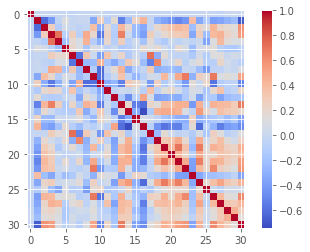

In [46]:
plt_corr = plt.imshow(poverty.corr(), cmap=plt.cm.coolwarm, interpolation='nearest')
plt_corr = plt.colorbar()

#### Scatter plot matrices

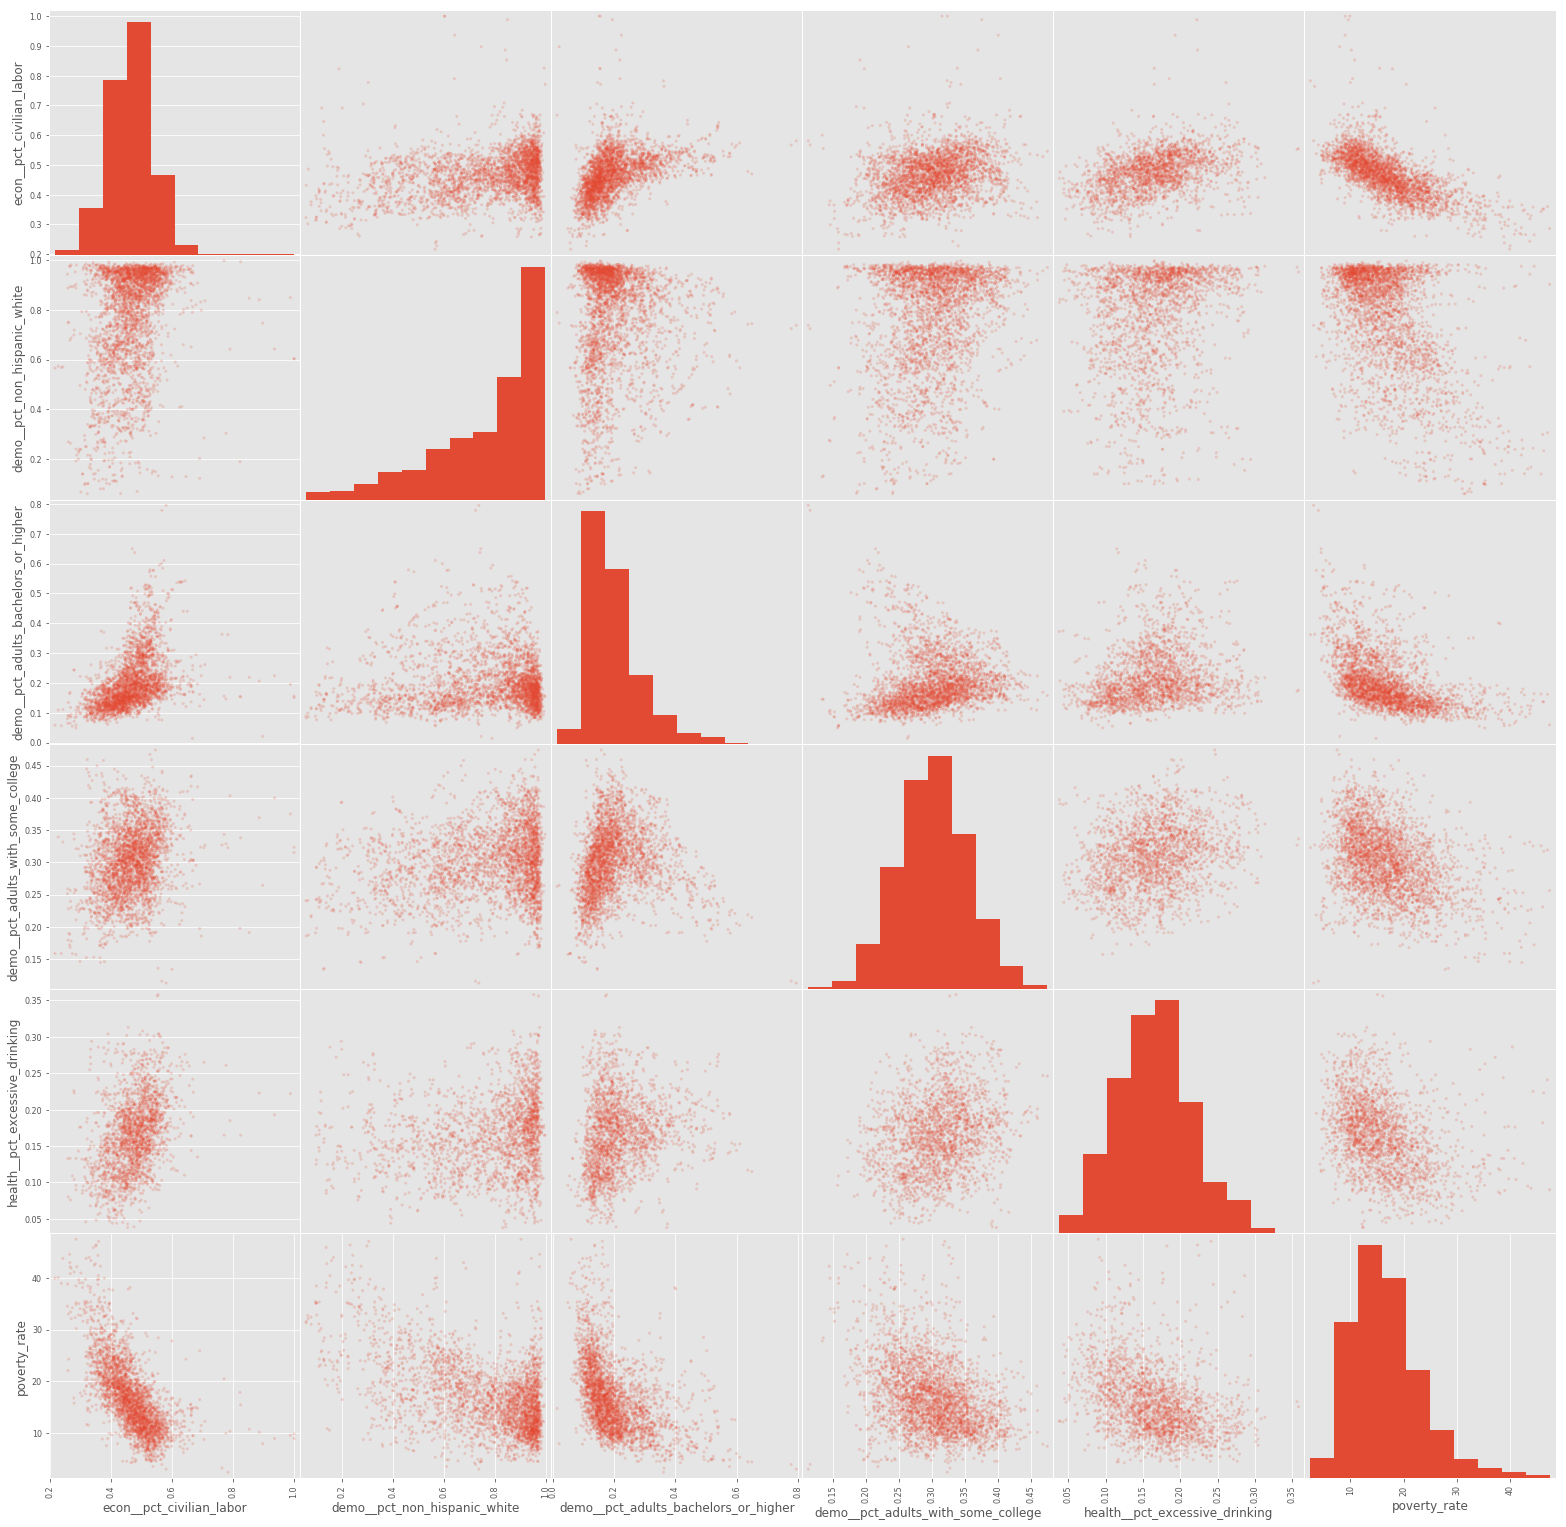

In [47]:
scatter_top_neg = scatter_matrix(poverty.loc[:, ['econ__pct_civilian_labor','demo__pct_non_hispanic_white'
                                              ,'demo__pct_adults_bachelors_or_higher','demo__pct_adults_with_some_college'
                                              ,'health__pct_excessive_drinking'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

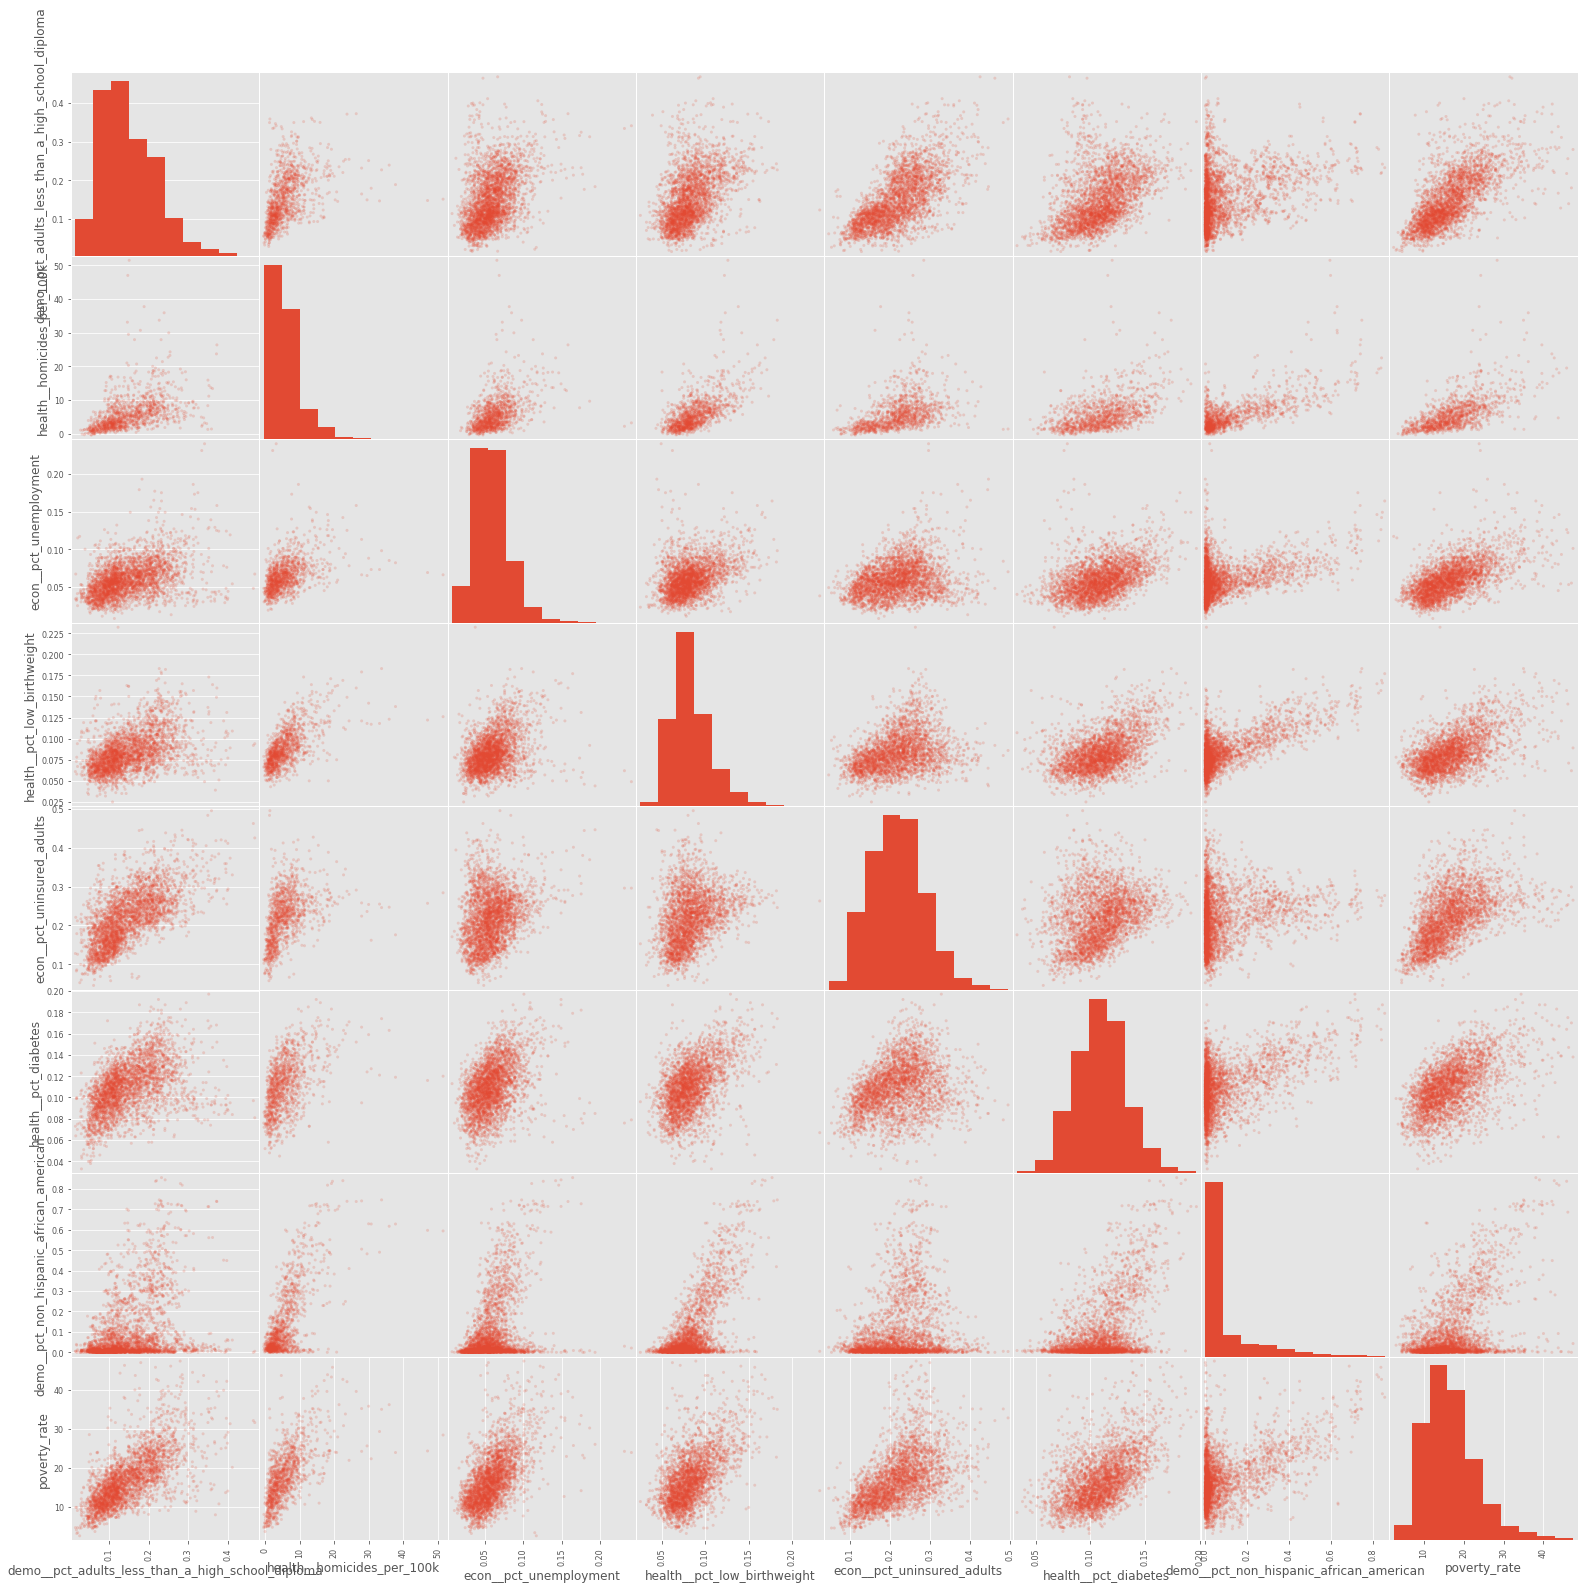

In [48]:
scatter_top_pos = scatter_matrix(poverty.loc[:, ['demo__pct_adults_less_than_a_high_school_diploma','health__homicides_per_100k'
                                              ,'econ__pct_unemployment','health__pct_low_birthweight'
                                              ,'econ__pct_uninsured_adults', 'health__pct_diabetes'
                                              , 'demo__pct_non_hispanic_african_american'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

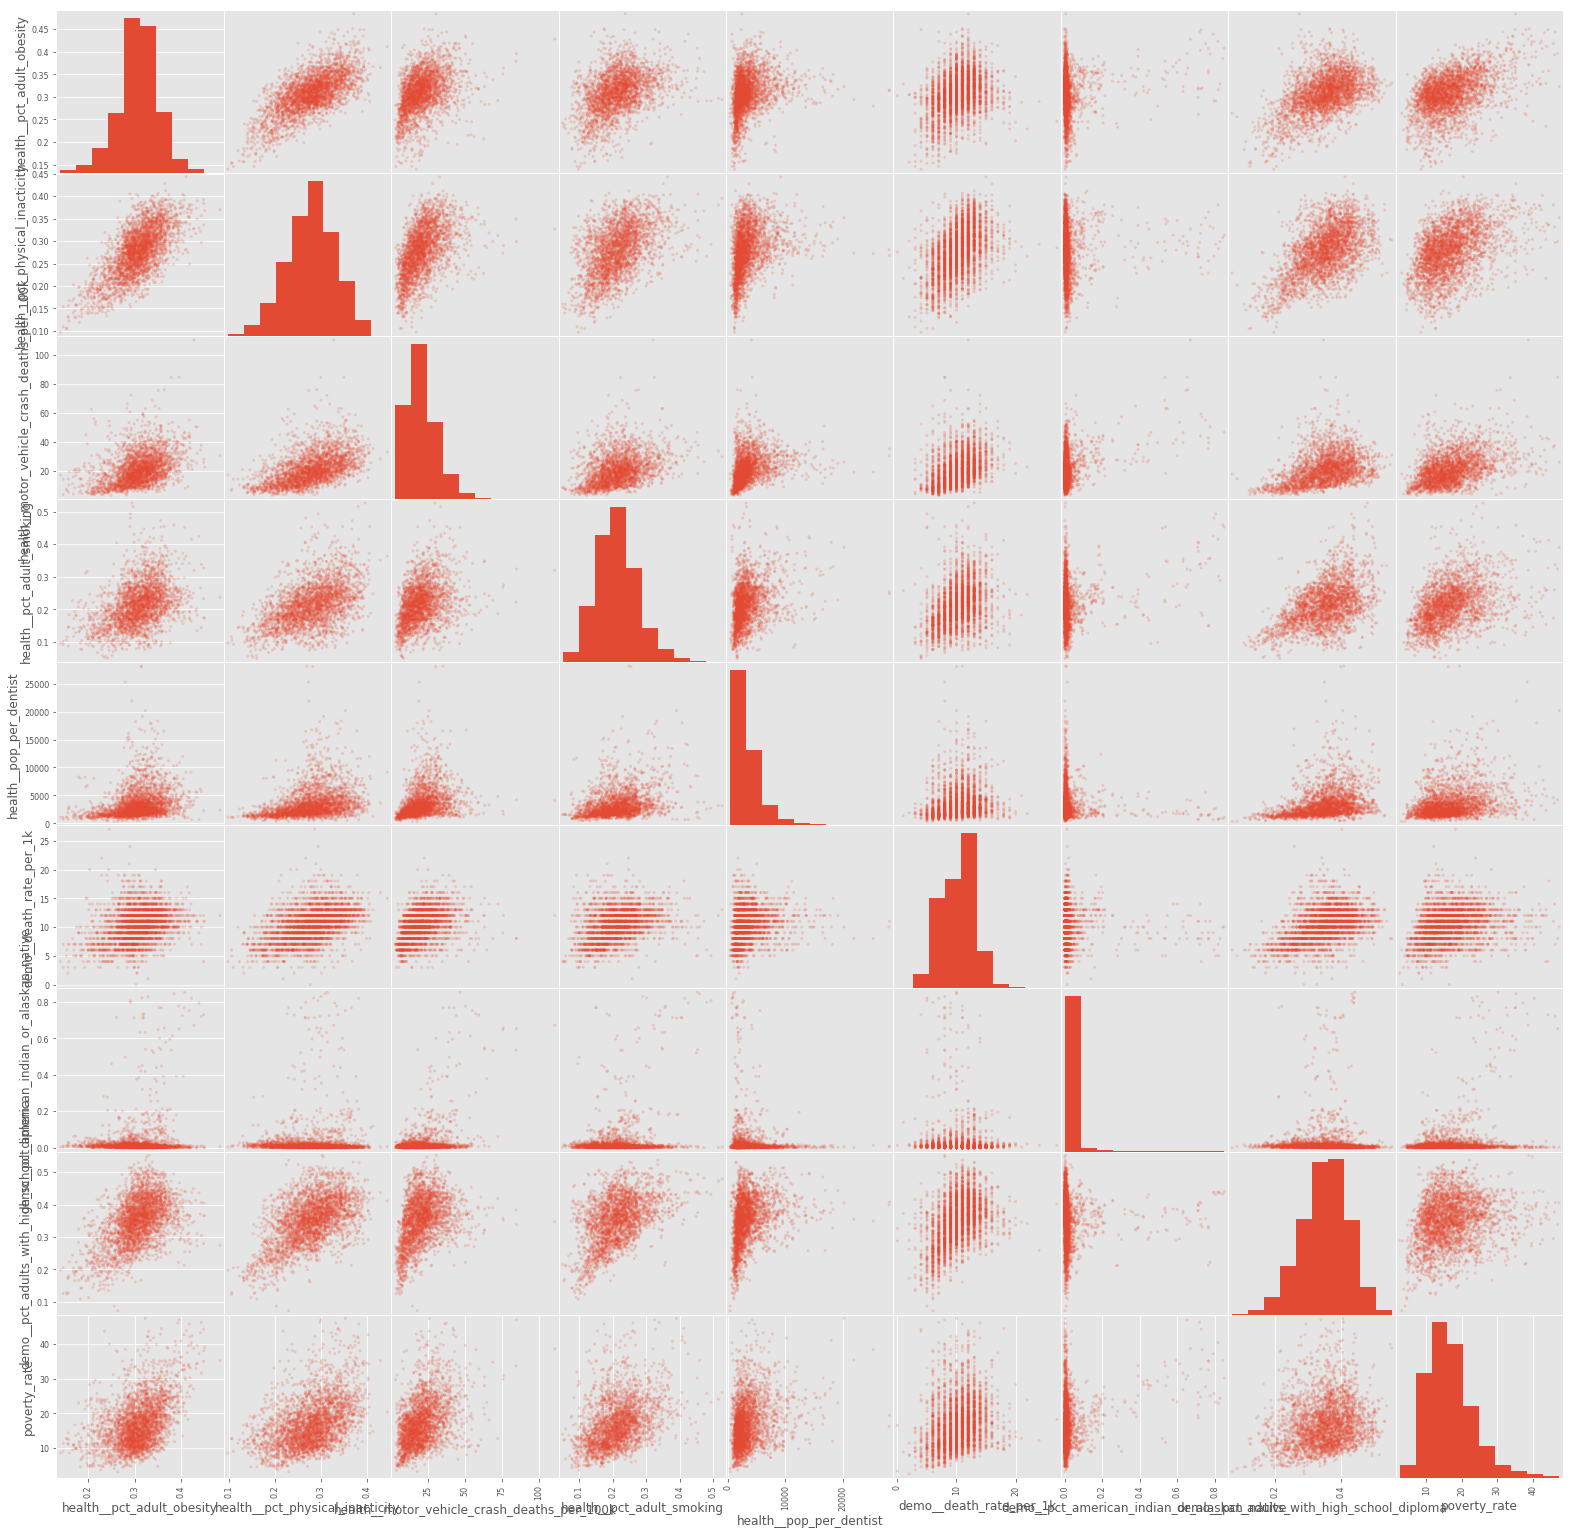

In [49]:
scatter_low_pos = scatter_matrix(poverty.loc[:, ['health__pct_adult_obesity', 'health__pct_physical_inacticity'
                                                ,'health__motor_vehicle_crash_deaths_per_100k', 'health__pct_adult_smoking'
                                                ,'health__pop_per_dentist','demo__death_rate_per_1k'
                                                ,'demo__pct_american_indian_or_alaskan_native','demo__pct_adults_with_high_school_diploma'
                                                ,'poverty_rate']]
                                , alpha=0.2, figsize=(27, 27), diagonal='hist')

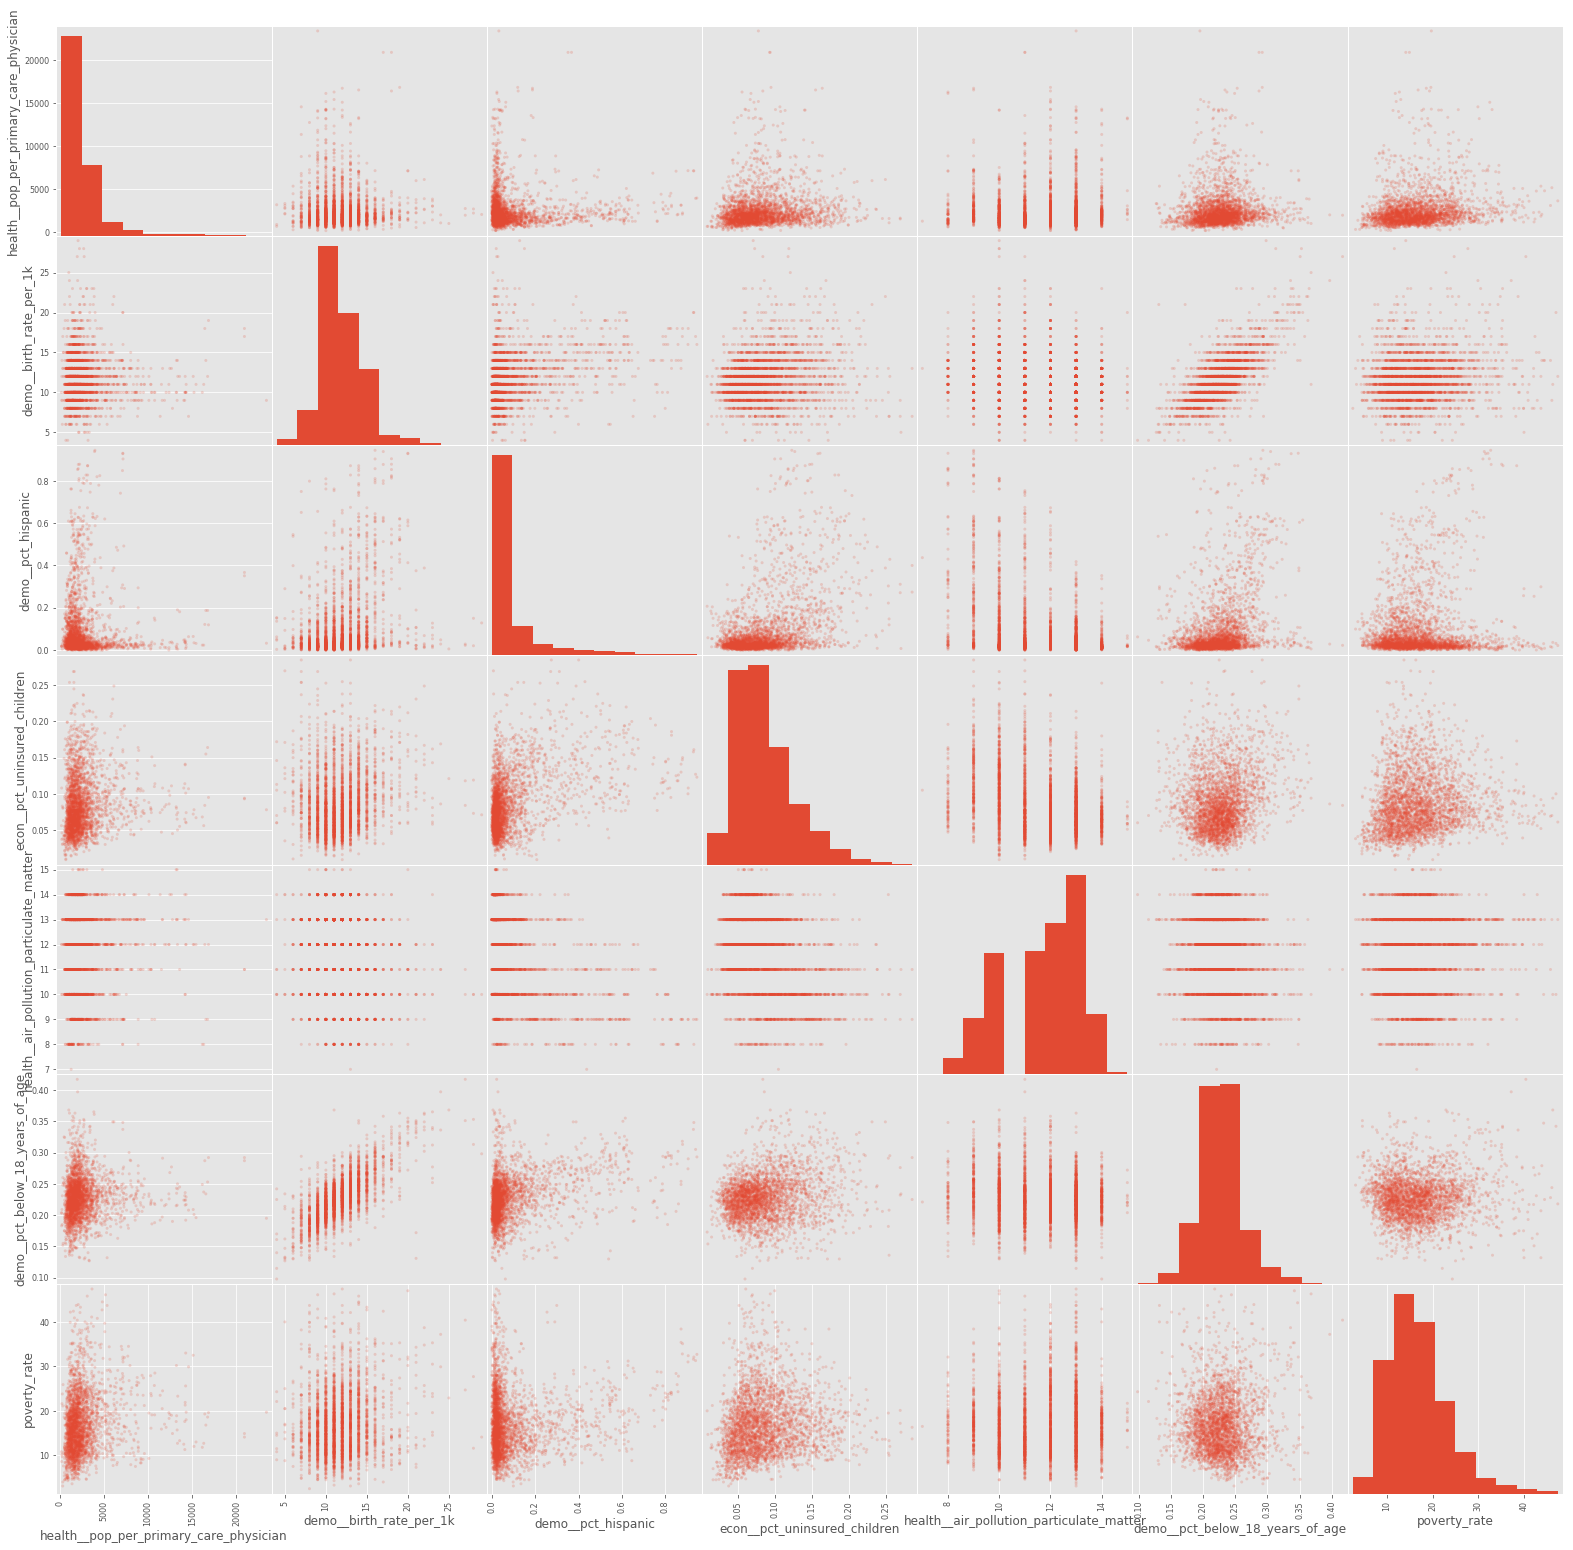

In [50]:
scatter_lowest_pos = scatter_matrix(poverty.loc[:, ['health__pop_per_primary_care_physician','demo__birth_rate_per_1k'
                                                    ,'demo__pct_hispanic','econ__pct_uninsured_children'
                                                    ,'health__air_pollution_particulate_matter', 'demo__pct_below_18_years_of_age'
                                                    ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

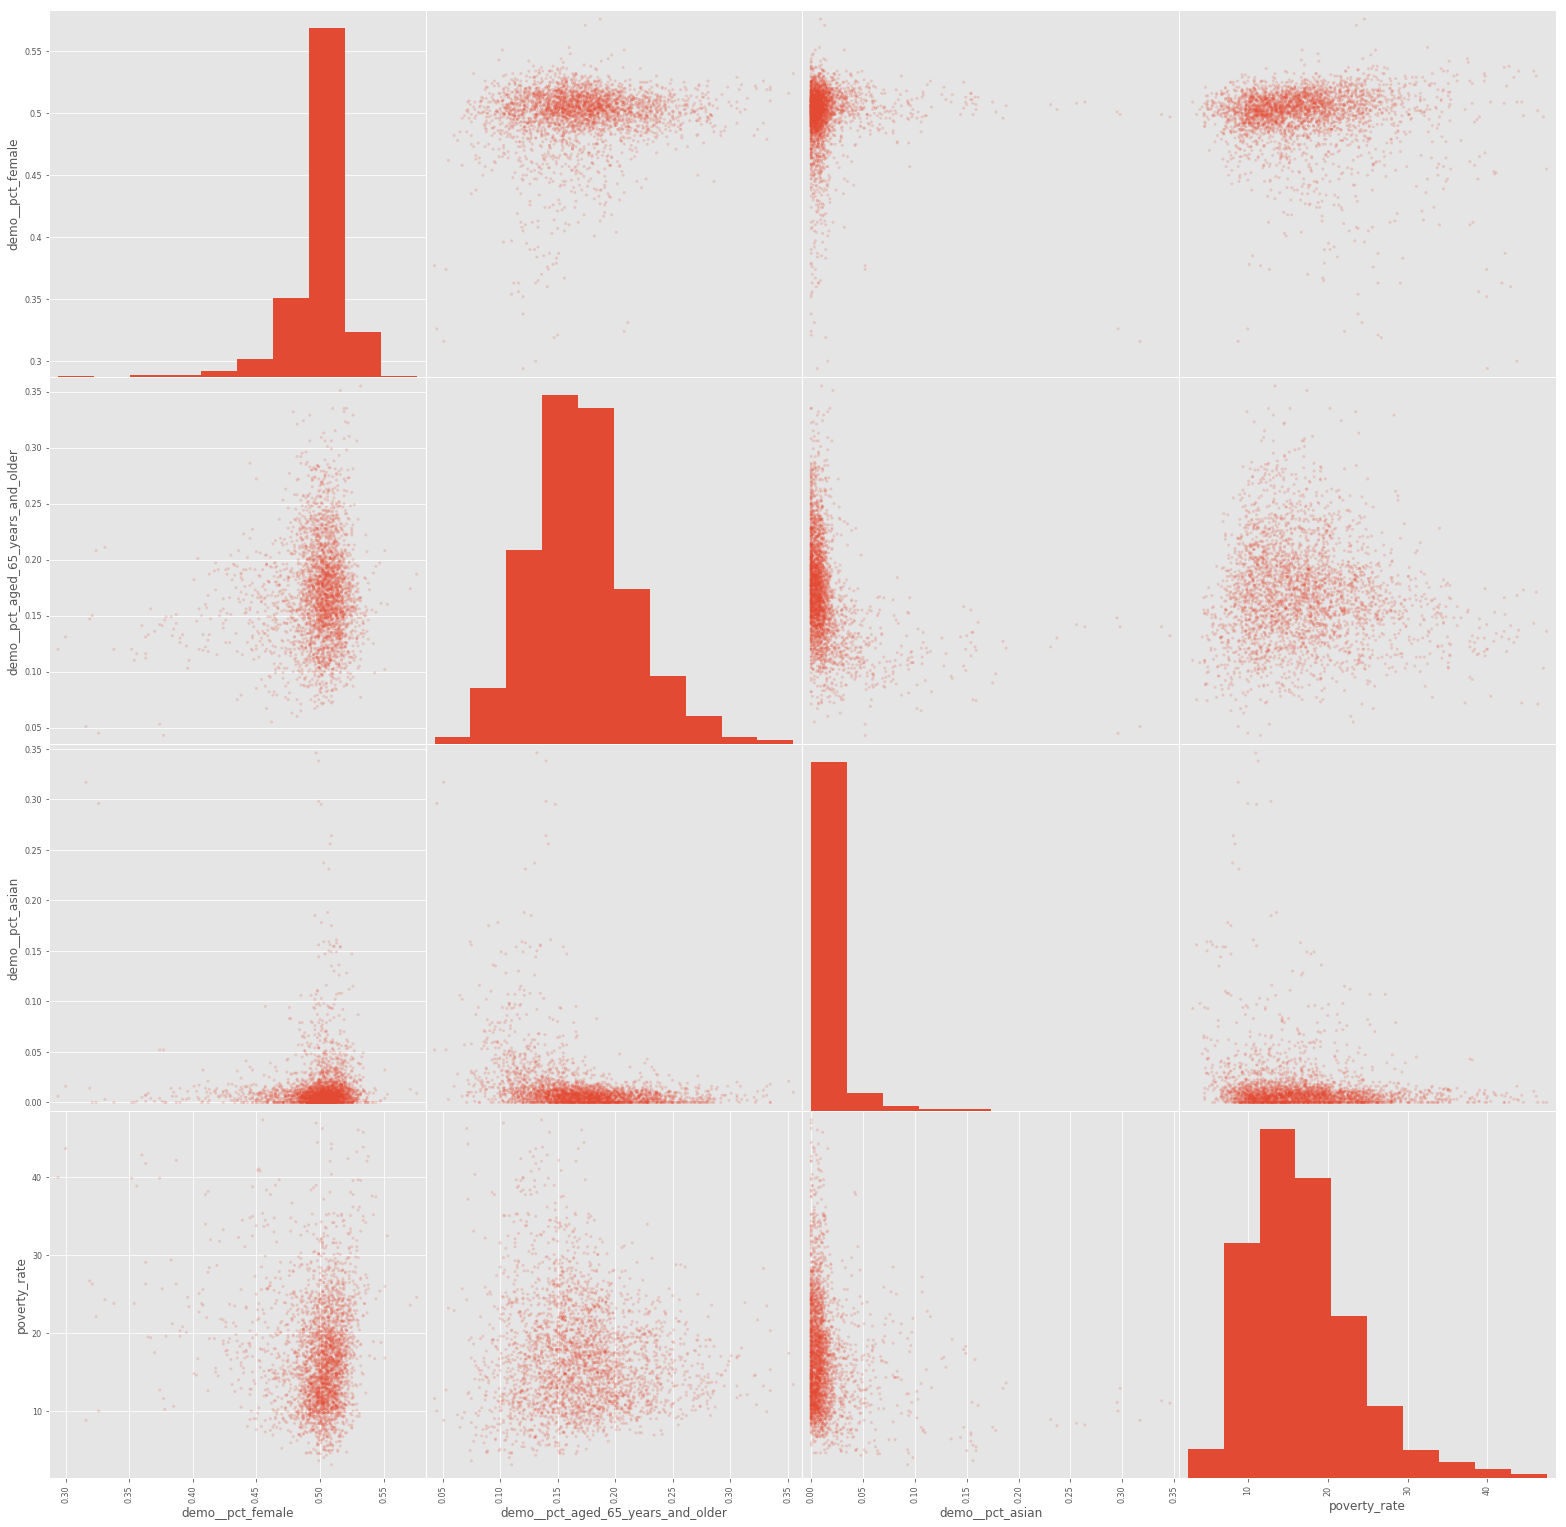

In [51]:
scatter_lowest_neg = scatter_matrix(poverty.loc[:, ['demo__pct_female','demo__pct_aged_65_years_and_older'
                                                    ,'demo__pct_asian'
                                                    ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [52]:
poverty.health__air_pollution_particulate_matter.unique()

array([ 12.,  14.,  10.,  11.,  13.,   9.,   8.,  nan,  15.,   7.])

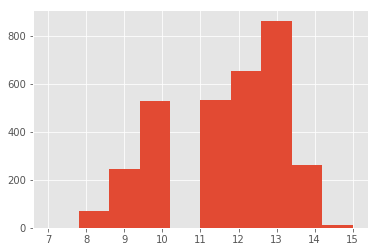

In [53]:
hist_air_poll = poverty.health__air_pollution_particulate_matter.hist()

In [54]:
poverty.demo__death_rate_per_1k.unique()

array([ 11.,  13.,   6.,  12.,   7.,  17.,  10.,   5.,   8.,   9.,  15.,
        16.,  14.,   3.,  19.,   2.,  20.,  18.,  21.,   4.,  27.,   1.,
        24.,   0.,  22.])

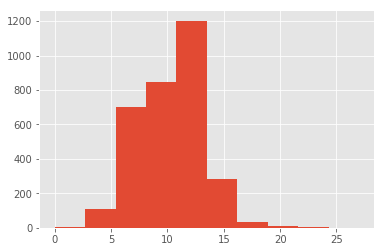

In [55]:
poverty.demo__death_rate_per_1k.hist()

### TODO Outliers Analysis!

## Cleaning the Data
In this phase or stage we clean the data:
* drop features with low prediction value
* replace missing values
* scale features???

### Drop columns
We will start by dropping the columns or features with low prediction value. The features 'area__rucc', 'age_cat', 'area__urban_influence', 'econ__economic_typology' and 'rucc' are redundant with the new features 'age_rucc', 'aui' and 'eet' we created. The feature 'yr' does not hold value to predict poverty_rate???????.

In [56]:
def drop_feature(input_df):
    result_df = input_df.drop(columns=['yr'], axis=1)
#     result_df = input_df.drop(columns=['area__rucc','age_cat','area__urban_influence'
#                                 ,'econ__economic_typology','rucc','yr'], axis=1)
    return result_df

In [57]:
poverty_clean = drop_feature(poverty)

### Convert feature to right type

In [58]:
def convert_to_cat(input_df):
#     input_df.loc[:,'eet'] = input_df.eet.astype("category")
#     input_df.loc[:,'aui'] = input_df.aui.astype("category")
#     input_df.loc[:,'age_rucc'] = input_df.age_rucc.astype("category")
    input_df.loc[:,'area__urban_influence'] = input_df.area__urban_influence.astype("category")
    input_df.loc[:,'econ__economic_typology'] = input_df.econ__economic_typology.astype("category")
    input_df.loc[:,'area__rucc'] = input_df.area__rucc.astype("category")
    return input_df

In [59]:
poverty_clean = convert_to_cat(poverty_clean)

In [60]:
poverty_clean.dtypes

row_id                                                 int64
area__rucc                                          category
area__urban_influence                               category
econ__economic_typology                             category
econ__pct_civilian_labor                             float64
econ__pct_unemployment                               float64
econ__pct_uninsured_adults                           float64
econ__pct_uninsured_children                         float64
demo__pct_female                                     float64
demo__pct_below_18_years_of_age                      float64
demo__pct_aged_65_years_and_older                    float64
demo__pct_hispanic                                   float64
demo__pct_non_hispanic_african_american              float64
demo__pct_non_hispanic_white                         float64
demo__pct_american_indian_or_alaskan_native          float64
demo__pct_asian                                      float64
demo__pct_adults_less_th

### Apply SQRT Transformation

In [61]:
def apply_log10(input_df):
    float_df = input_df.loc[:, input_df.dtypes == np.float]
    float_df = float_df.replace(0,1)
    input_df.loc[:, input_df.dtypes == np.float] = np.log10(float_df)
    return input_df

def apply_pov_rate_sqrt(input_df):
    input_df.loc[:, 'poverty_rate'] = np.sqrt(input_df.loc[:, 'poverty_rate'])
    return input_df

In [62]:
# poverty_clean = apply_log10(poverty_clean)
# poverty_clean = apply_pov_rate_sqrt(poverty_clean)

### Replace Missing Values
The missing values are replaced by the respective median value of the feature or variable.

In [63]:
def clean_nans(input_df):
    result_df = input_df.fillna(poverty_clean.mean())
    return result_df

In [64]:
poverty_clean = clean_nans(poverty_clean)
poverty_clean.shape

(3198, 34)

As we can see here under there are no missing values.

In [65]:
poverty_clean.isnull().sum()

row_id                                              0
area__rucc                                          0
area__urban_influence                               0
econ__economic_typology                             0
econ__pct_civilian_labor                            0
econ__pct_unemployment                              0
econ__pct_uninsured_adults                          0
econ__pct_uninsured_children                        0
demo__pct_female                                    0
demo__pct_below_18_years_of_age                     0
demo__pct_aged_65_years_and_older                   0
demo__pct_hispanic                                  0
demo__pct_non_hispanic_african_american             0
demo__pct_non_hispanic_white                        0
demo__pct_american_indian_or_alaskan_native         0
demo__pct_asian                                     0
demo__pct_adults_less_than_a_high_school_diploma    0
demo__pct_adults_with_high_school_diploma           0
demo__pct_adults_with_some_c

### TODO Scale Features!!!
Most of the quantitative features are already scaled between 0 and 1. However the following features are not:
* **demo__birth_rate_per_1k** (behave like categorical variables)
* **demo__death_rate_per_1k** (behave like categorical variables)
* **health__air_pollution_particulate_matter** (behave like categorical variables)
* health__homicides_per_100k
* health__motor_vehicle_crash_deaths_per_100k
* health__pop_per_dentist
* health__pop_per_primary_care_physician

This is why we apply the MinMaxScaler

In [66]:
def scale_features(input_df):
    input_scale = input_df.loc[:,['demo__birth_rate_per_1k','demo__death_rate_per_1k'
                                    ,'health__air_pollution_particulate_matter','health__homicides_per_100k'
                                    ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                    ,'health__pop_per_primary_care_physician']]
    
    input_scaled = pd.DataFrame(MinMaxScaler().fit_transform(input_scale), columns=input_scale.columns)
    
    input_df.loc[:,'demo__birth_rate_per_1k'] = input_scaled.loc[:,'demo__birth_rate_per_1k']
    input_df.loc[:,'demo__death_rate_per_1k'] = input_scaled.loc[:,'demo__death_rate_per_1k']
    input_df.loc[:,'health__air_pollution_particulate_matter'] = input_scaled.loc[:,'health__air_pollution_particulate_matter']
    input_df.loc[:,'health__homicides_per_100k'] = input_scaled.loc[:,'health__homicides_per_100k']
    input_df.loc[:,'health__motor_vehicle_crash_deaths_per_100k'] = input_scaled.loc[:,'health__motor_vehicle_crash_deaths_per_100k']
    input_df.loc[:,'health__pop_per_dentist'] = input_scaled.loc[:,'health__pop_per_dentist']
    input_df.loc[:,'health__pop_per_primary_care_physician'] = input_scaled.loc[:,'health__pop_per_primary_care_physician']
    
    return input_df

In [67]:
poverty_clean = scale_features(poverty_clean)
poverty_clean.describe()

row_id  econ__pct_civilian_labor  econ__pct_unemployment  \
count  3198.000000               3198.000000              3198.00000   
mean   3156.692620                  0.467071                 0.05961   
std    1823.959278                  0.074541                 0.02285   
min       0.000000                  0.217000                 0.00800   
25%    1561.750000                  0.420000                 0.04400   
50%    3198.500000                  0.467000                 0.05700   
75%    4723.750000                  0.514000                 0.07100   
max    6277.000000                  1.000000                 0.24000   

       econ__pct_uninsured_adults  econ__pct_uninsured_children  \
count                 3198.000000                   3198.000000   
mean                     0.217534                      0.085920   
std                      0.067351                      0.039992   
min                      0.046000                      0.009000   
25%                      0.166250                      0.057000   
50%                      0.216000                      0.077000   
75%                      0.262000                      0.105000   
max                      0.495000                      0.285000   

       demo__pct_female  demo__pct_below_18_years_of_age  \
count       3198.000000                      3198.000000   
mean           0.498781                         0.227763   
std            0.024243                         0.034280   
min            0.294000                         0.098000   
25%            0.493000                         0.207000   
50%            0.503000                         0.226000   
75%            0.512000                         0.245000   
max            0.576000                         0.417000   

       demo__pct_aged_65_years_and_older  demo__pct_hispanic  \
count                        3198.000000         3198.000000   
mean                            0.170137            0.090233   
std                             0.043580            0.142663   
min                             0.043000            0.000000   
25%                             0.142000            0.019000   
50%                             0.167000            0.035000   
75%                             0.194000            0.088000   
max                             0.355000            0.945000   

       demo__pct_non_hispanic_african_american  demo__pct_non_hispanic_white  \
count                              3198.000000                   3198.000000   
mean                                  0.091117                      0.770207   
std                                   0.147058                      0.207838   
min                                   0.000000                      0.060000   
25%                                   0.006000                      0.648250   
50%                                   0.022000                      0.854000   
75%                                   0.096000                      0.936000   
max                                   0.855000                      0.998000   

       demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
count                                  3198.000000      3198.000000   
mean                                      0.024659         0.013304   
std                                       0.084608         0.025358   
min                                       0.000000         0.000000   
25%                                       0.002000         0.003000   
50%                                       0.007000         0.007000   
75%                                       0.014000         0.013000   
max                                       0.852000         0.346000   

       demo__pct_adults_less_than_a_high_school_diploma  \
count                                       3198.000000   
mean                                           0.148794   
std                                            0.068255   
min                                         

### One Hot Encoding of Categorical Variables

In [68]:
def cat_to_dummies(input_df):
#     result_df = pd.get_dummies(input_df, dummy_na=True, columns=['age_rucc','aui','eet'])
    result_df = pd.get_dummies(input_df, dummy_na=True, columns=['area__urban_influence','econ__economic_typology'
                                                                 ,'area__rucc'])
    return result_df

In [69]:
poverty_clean = cat_to_dummies(poverty_clean)
poverty_clean.head()

row_id  econ__pct_civilian_labor  econ__pct_unemployment  \
0       0                     0.358                   0.089   
1       2                     0.503                   0.057   
2       4                     0.471                   0.070   
3       5                     0.578                   0.049   
4       8                     0.530                   0.046   

   econ__pct_uninsured_adults  econ__pct_uninsured_children  demo__pct_female  \
0                       0.253                         0.099             0.494   
1                       0.171                         0.065             0.503   
2                       0.297                         0.122             0.497   
3                       0.231                         0.107             0.474   
4                       0.262                         0.067             0.513   

   demo__pct_below_18_years_of_age  demo__pct_aged_65_years_and_older  \
0                            0.200                              0.195   
1                            0.243                              0.166   
2                            0.250                              0.178   
3                            0.194                              0.196   
4                            0.206                              0.101   

   demo__pct_hispanic  demo__pct_non_hispanic_african_american  \
0               0.044                                    0.517   
1               0.017                                    0.016   
2               0.554                                    0.002   
3               0.031                                    0.002   
4               0.433                                    0.096   

   demo__pct_non_hispanic_white  demo__pct_american_indian_or_alaskan_native  \
0                         0.378                                        0.056   
1                         0.954                                        0.002   
2                         0.428                                        0.009   
3                         0.916                                        0.043   
4                         0.294                                        0.011   

   demo__pct_asian  demo__pct_adults_less_than_a_high_school_diploma  \
0            0.000                                          0.223896   
1            0.018                                          0.113524   
2            0.008                                          0.236346   
3            0.002                                          0.091365   
4            0.149                                          0.171598   

   demo__pct_adults_with_high_school_diploma  \
0                                   0.345382   
1                                   0.484699   
2                                   0.309831   
3                                   0.388554   
4                                   0.266272   

   demo__pct_adults_with_some_college  demo__pct_adults_bachelors_or_higher  \
0                            0.273092                              0.157631   
1                            0.235933                              0.165844   
2                            0.315789                              0.138034   
3                            0.349398                              0.170683   
4                            0.190335                              0.371795   

   demo__birth_rate_per_1k  demo__death_rate_per_1k  \
0                     0.24                 0.407407   
1                     0.32                 0.407407   
2                     0.24                 0.407407   
3                     0.12                 0.481481   
4                     0.44                 0.222222   

   health__pct_adult_obesity  health__pct_adult_smoking  health__pct_diabetes  \
0                      0.345                   0.219000                 0.159   
1                      0.296                   0.222000                 0.123   
2                      0.267                   0.

In [70]:
poverty_clean.dtypes

row_id                                                                                                                        int64
econ__pct_civilian_labor                                                                                                    float64
econ__pct_unemployment                                                                                                      float64
econ__pct_uninsured_adults                                                                                                  float64
econ__pct_uninsured_children                                                                                                float64
demo__pct_female                                                                                                            float64
demo__pct_below_18_years_of_age                                                                                             float64
demo__pct_aged_65_years_and_older                                           

In [71]:
poverty_clean.shape

(3198, 61)

## Model Building

In [72]:
rng = np.random.RandomState(0)

In [73]:
poverty_X = poverty_clean.drop(columns=['row_id','poverty_rate'], axis=1)
poverty_y = poverty_clean.poverty_rate

In [74]:
# use r2 adjusted in the future
scoring = {'r2':'r2','mse': make_scorer(mean_squared_error, greater_is_better=False)}

In [75]:
inner_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
outer_cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=rng)

### Plain Least Square Regression

In [76]:
lin_reg = LinearRegression()
lin_reg_grid = GridSearchCV(estimator=lin_reg, param_grid={}, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='r2')
lin_reg_grid.fit(poverty_X, poverty_y)

GridSearchCV(cv=ShuffleSplit(n_splits=5,
       random_state=<mtrand.RandomState object at 0x1a2d944678>,
       test_size=0.3, train_size=None),
       error_score=0,
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit='r2', return_train_score='warn',
       scoring={'r2': 'r2', 'mse': make_scorer(mean_squared_error, greater_is_better=False)},
       verbose=0)

In [77]:
train_scores = cross_validate(lin_reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.78450894230339474
0.36630573296694857


### Feature Selection with Least Square Linear Regression

In [78]:
caching = mkdtemp()

mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=LinearRegression(), step=1, cv=inner_cv, scoring='r2')

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 51


In [79]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.77128292248032559
0.37527939635403396


In [80]:
[ranking for ranking in zip(rfecv.ranking_, poverty_X.columns)]

[(1, 'econ__pct_civilian_labor'),
 (1, 'econ__pct_unemployment'),
 (1, 'econ__pct_uninsured_adults'),
 (1, 'econ__pct_uninsured_children'),
 (1, 'demo__pct_female'),
 (1, 'demo__pct_below_18_years_of_age'),
 (1, 'demo__pct_aged_65_years_and_older'),
 (1, 'demo__pct_hispanic'),
 (1, 'demo__pct_non_hispanic_african_american'),
 (1, 'demo__pct_non_hispanic_white'),
 (1, 'demo__pct_american_indian_or_alaskan_native'),
 (1, 'demo__pct_asian'),
 (1, 'demo__pct_adults_less_than_a_high_school_diploma'),
 (1, 'demo__pct_adults_with_high_school_diploma'),
 (1, 'demo__pct_adults_with_some_college'),
 (1, 'demo__pct_adults_bachelors_or_higher'),
 (1, 'demo__birth_rate_per_1k'),
 (1, 'demo__death_rate_per_1k'),
 (1, 'health__pct_adult_obesity'),
 (1, 'health__pct_adult_smoking'),
 (1, 'health__pct_diabetes'),
 (1, 'health__pct_low_birthweight'),
 (1, 'health__pct_excessive_drinking'),
 (1, 'health__pct_physical_inacticity'),
 (1, 'health__air_pollution_particulate_matter'),
 (1, 'health__homicides_

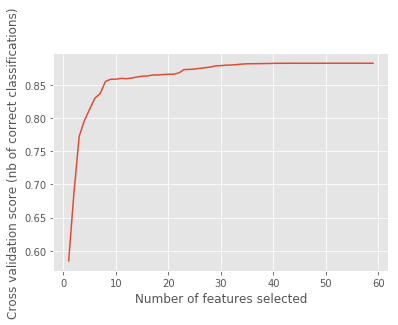

In [81]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

### Linear Regression Model Selection
We use nested cross validation to select the best model and score it. The regression models are scored using RMSE.

In [82]:
cachedir = mkdtemp()
estimators = [('reg_model', Lasso(random_state=rng))]
regr_pipe = Pipeline(estimators, memory=cachedir)

In [83]:
param_grid = dict(reg_model=[Lasso(random_state=rng), Ridge(random_state=rng)]
                 , reg_model__alpha=[0.1,0.3,0.5,0.7,1,2,3,5,7]
                 , reg_model__tol=[0.1,0.01,0.001,0.0001])

In [84]:
reg_grid = GridSearchCV(estimator=regr_pipe, param_grid=param_grid, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='r2')
reg_pred = reg_grid.fit(poverty_X, poverty_y)
reg_pred.best_estimator_

Pipeline(memory='/var/folders/_j/vyb4dyfx2wq850vj9vh25wy40000gn/T/tmpy9ea8na0',
     steps=[('reg_model', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False,
   random_state=<mtrand.RandomState object at 0x1a2d944678>, solver='auto',
   tol=0.1))])

In [85]:
train_scores = cross_validate(reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True,)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.78185420146959039
0.36311505644443792


In [86]:
rfecv = RFECV(estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=rng, solver='auto', tol=0.1), step=1, cv=inner_cv, scoring=mse)
rfecv.fit(poverty_X, poverty_y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 52


In [87]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.78647928594924055
0.3663139678474347


## TODO Analyze Residuals!!!

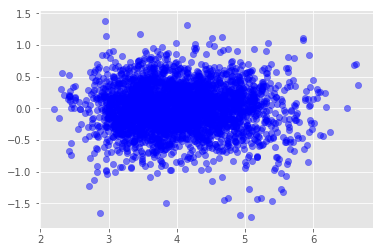

In [88]:
plt.scatter(reg_grid.predict(poverty_X), reg_grid.predict(poverty_X) - poverty_y, c='b', s=40, alpha=0.5)

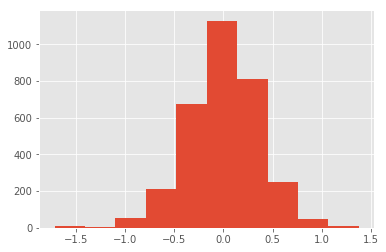

In [89]:
residuals = reg_grid.predict(poverty_X) - poverty_y
residuals = residuals.rename('residuals')
residuals.hist()

In [90]:
poverty_X_residuals = pd.concat([poverty_X, poverty.area__urban_influence, poverty.econ__economic_typology, poverty.area__rucc, poverty_y, residuals], axis=1)
poverty_X_high_res = poverty_X_residuals[(poverty_X_residuals.residuals > 7) | (poverty_X_residuals.residuals < -7)]
poverty_X_high_res.describe()

econ__pct_civilian_labor  econ__pct_unemployment  \
count                       0.0                     0.0   
mean                        NaN                     NaN   
std                         NaN                     NaN   
min                         NaN                     NaN   
25%                         NaN                     NaN   
50%                         NaN                     NaN   
75%                         NaN                     NaN   
max                         NaN                     NaN   

       econ__pct_uninsured_adults  econ__pct_uninsured_children  \
count                         0.0                           0.0   
mean                          NaN                           NaN   
std                           NaN                           NaN   
min                           NaN                           NaN   
25%                           NaN                           NaN   
50%                           NaN                           NaN   
75%                           NaN                           NaN   
max                           NaN                           NaN   

       demo__pct_female  demo__pct_below_18_years_of_age  \
count               0.0                              0.0   
mean                NaN                              NaN   
std                 NaN                              NaN   
min                 NaN                              NaN   
25%                 NaN                              NaN   
50%                 NaN                              NaN   
75%                 NaN                              NaN   
max                 NaN                              NaN   

       demo__pct_aged_65_years_and_older  demo__pct_hispanic  \
count                                0.0                 0.0   
mean                                 NaN                 NaN   
std                                  NaN                 NaN   
min                                  NaN                 NaN   
25%                                  NaN                 NaN   
50%                                  NaN                 NaN   
75%                                  NaN                 NaN   
max                                  NaN                 NaN   

       demo__pct_non_hispanic_african_american  demo__pct_non_hispanic_white  \
count                                      0.0                           0.0   
mean                                       NaN                           NaN   
std                                        NaN                           NaN   
min                                        NaN                           NaN   
25%                                        NaN                           NaN   
50%                                        NaN                           NaN   
75%                                        NaN                           NaN   
max                                        NaN                           NaN   

       demo__pct_american_indian_or_alaskan_native  demo__pct_asian  \
count                                          0.0              0.0   
mean                                           NaN              NaN   
std                                            NaN              NaN   
min                                            NaN              NaN   
25%                                            NaN              NaN   
50%                                            NaN              NaN   
75%                                            NaN              NaN   
max                                            NaN              NaN   

       demo__pct_adults_less_than_a_high_school_diploma  \
count                                               0.0   
mean                                                NaN   
std                                                 NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                   

In [91]:
poverty_X_high_res.head()

Empty DataFrame
Columns: [econ__pct_civilian_labor, econ__pct_unemployment, econ__pct_uninsured_adults, econ__pct_uninsured_children, demo__pct_female, demo__pct_below_18_years_of_age, demo__pct_aged_65_years_and_older, demo__pct_hispanic, demo__pct_non_hispanic_african_american, demo__pct_non_hispanic_white, demo__pct_american_indian_or_alaskan_native, demo__pct_asian, demo__pct_adults_less_than_a_high_school_diploma, demo__pct_adults_with_high_school_diploma, demo__pct_adults_with_some_college, demo__pct_adults_bachelors_or_higher, demo__birth_rate_per_1k, demo__death_rate_per_1k, health__pct_adult_obesity, health__pct_adult_smoking, health__pct_diabetes, health__pct_low_birthweight, health__pct_excessive_drinking, health__pct_physical_inacticity, health__air_pollution_particulate_matter, health__homicides_per_100k, health__motor_vehicle_crash_deaths_per_100k, health__pop_per_dentist, health__pop_per_primary_care_physician, area__urban_influence_Large-in a metro area with at least 1 million residents or more, area__urban_influence_Micropolitan adjacent to a large metro area, area__urban_influence_Micropolitan adjacent to a small metro area, area__urban_influence_Micropolitan not adjacent to a metro area, area__urban_influence_Noncore adjacent to a large metro area, area__urban_influence_Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents, area__urban_influence_Noncore adjacent to a small metro with town of at least 2,500 residents, area__urban_influence_Noncore adjacent to micro area and contains a town of 2,500-19,999 residents, area__urban_influence_Noncore adjacent to micro area and does not contain a town of at least 2,500 residents, area__urban_influence_Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents, area__urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents, area__urban_influence_Small-in a metro area with fewer than 1 million residents, area__urban_influence_nan, econ__economic_typology_Farm-dependent, econ__economic_typology_Federal/State government-dependent, econ__economic_typology_Manufacturing-dependent, econ__economic_typology_Mining-dependent, econ__economic_typology_Nonspecialized, econ__economic_typology_Recreation, econ__economic_typology_nan, area__rucc_Metro - Counties in metro areas of 1 million population or more, area__rucc_Metro - Counties in metro areas of 250,000 to 1 million population, area__rucc_Metro - Counties in metro areas of fewer than 250,000 population, area__rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area, area__rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area, area__rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area, area__rucc_Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area, area__rucc_Nonmetro - Urban population of 20,000 or more, adjacent to a metro area, area__rucc_Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area, area__rucc_nan, area__urban_influence, econ__economic_typology, area__rucc, poverty_rate, residuals]
Index: []

ValueError: not enough values to unpack (expected 2, got 0)

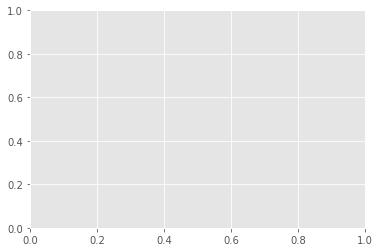

In [92]:
poverty_X_high_res.boxplot(column='residuals', by='area__urban_influence', vert=False)

In [ ]:
poverty_X_high_res.boxplot(column='residuals', by='econ__economic_typology', vert=False)

In [ ]:
poverty_X_high_res.boxplot(column='residuals', by='area__rucc', vert=False)

In [ ]:
scatter_high_res_pos = scatter_matrix(poverty_X_high_res.loc[:, ['demo__pct_adults_less_than_a_high_school_diploma','health__homicides_per_100k'
                                              ,'econ__pct_unemployment','health__pct_low_birthweight'
                                              ,'econ__pct_uninsured_adults', 'health__pct_diabetes'
                                              , 'demo__pct_non_hispanic_african_american'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_high_res__neg = scatter_matrix(poverty_X_high_res.loc[:, ['econ__pct_civilian_labor','demo__pct_non_hispanic_white'
                                              ,'demo__pct_adults_bachelors_or_higher','demo__pct_adults_with_some_college'
                                              ,'health__pct_excessive_drinking'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

## Evaluation

In [ ]:
poverty_test = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Test_values.csv')

In [ ]:
poverty_test.shape

In [ ]:
#Create Features
# poverty_test = create_rucc(poverty_test)
# poverty_test = create_eet(poverty_test)
# poverty_test = create_aui(poverty_test)
# poverty_test = create_age_cat(poverty_test, young_counties, old_counties)
# poverty_test = create_age_rucc(poverty_test, young_counties, old_counties)

#Convert to correct type
poverty_test = convert_to_cat(poverty_test)

#Drop Features
poverty_row_id = poverty_test.row_id
# poverty_test = poverty_test.drop(columns=['row_id','area__rucc','age_cat','area__urban_influence'
#                                           ,'econ__economic_typology','rucc','yr'], axis=1)
poverty_test = poverty_test.drop(columns=['row_id','yr'], axis=1)
#Replace NANs
poverty_test_clean = poverty_test.fillna(poverty_test.median())
poverty_test_clean = pd.get_dummies(poverty_test_clean, columns=['area__urban_influence','econ__economic_typology'
                                                                 ,'area__rucc'], dummy_na=True)

#Scale Features
poverty_test_clean = scale_features(poverty_test_clean)

In [ ]:
#Create Prediction
#Remember to remove or change np.square transformation
submission = pd.DataFrame(lin_reg_grid.predict(poverty_test_clean))

In [ ]:
poverty_submission = pd.concat([poverty_row_id, submission], axis=1)
poverty_submission = poverty_submission.rename(index=str, columns={0: 'poverty_rate'})
poverty_submission = poverty_submission.round({'poverty_rate':2})

In [ ]:
poverty_submission.head()

In [ ]:
poverty_submission.shape

In [ ]:
poverty_submission.to_csv(path_or_buf='./MV_Poverty_Submission_LinReg.csv', index=False)